#<font color="green"> **1. Import Necessary Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore') # to make it easier to read

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os #saving file /directory mangement
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#<font color="green"> **2. Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [ ]:
# Import the dataset through Google Drive and read the dataset using the pandas library
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_Coursework/CW_Dataset_4127677.csv')

# Display the first few rows to confirm loading
print("Data File Preview:")
display(df.head())

Data File Preview:


,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,106.089,82.079,11.180,3.01,75.63,900.0,916.6,114.5,101.1,148.1,873.6,8.79,18.77,4.0
1,106.375,81.401,6.968,3.31,74.81,918.6,938.0,114.8,101.1,146.8,902.1,8.84,18.72,2.0
2,106.122,82.045,11.128,2.97,75.65,902.4,915.6,115.4,102.4,146.9,868.4,8.78,18.79,4.0
3,106.105,81.991,11.128,2.90,75.61,901.8,917.3,120.2,105.6,145.5,892.2,8.88,18.69,4.0
4,105.903,81.229,6.188,3.28,75.73,895.0,914.0,119.6,109.0,146.1,898.5,8.74,18.82,3.0


As a first step, load all the data set into the Python environment using Panda Library. To verify the successful import, print few ra few dataset rowsows of the dataset into the Python environment. This process of loading data and viewing first rows ensures reading for subsequent data exploration and processing steps.

In [ ]:
# check shape,samples
print(f"Dataset size:{df.shape}")
print(f"Number of sample:{df.shape[0]}")
print(f"Number of variables:{df.shape[1]}")

Dataset size:(1000, 14)
Number of sample:1000
Number of variables:14


In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set the display width


According to the shape of dataset it has 1000 rows and 14 columns.

#<font color="green"> **3. Background of the dataset**


Plastic injection moulding, a widely used process for producing complex plastic parts, faces challenges in maintaining consistent quality due to factors like melt temperature, injection pressure, cooling time, and mould temperature. Traditional quality control methods, which rely on post-production inspections, are slow, costly, and error-prone. **Machine Learning (ML)** helps predict defects during production, allowing real-time adjustments to prevent defective parts, improving efficiency, and reducing waste.


This Project is aims to predict the probability of defects in plastic injection moulding using advanced machine learning models.Ypu will work with real word manufacturing data,perform in-depth statistical analysis,develop robust redective models and build an interactive dashboard to present your finidings.

This dataset contains information on the **plastic injection moulding process**, where each row represents a **production cycle** and includes process parameters such as:

- **Mould temperature**
- **Injection pressure**
- **Cycle time**
- **Volume**

## Target Variable: `quality`
The target variable is a **multiclass label** categorizing product quality into four classes:

1. **Waste** – Product fails basic standards and must be discarded.  
2. **Acceptable** – Meets minimum standards but is not ideal.  
3. **Target** – Meets desired quality specifications.  
4. **Inefficient** – Above acceptable but below target due to process inefficiencies.

The objective of this project is to **classify the quality class of the products**


#<font color="green"> **4. Data Understanding**

In [ ]:
#To generate overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1000 non-null   float64
 1   Mold temperature                                  1000 non-null   float64
 2   time_to_fill                                      1000 non-null   float64
 3   ZDx - Plasticizing time                           1000 non-null   float64
 4   ZUx - Cycle time                                  1000 non-null   float64
 5   SKx - Closing force                               1000 non-null   float64
 6   SKs - Clamping force peak value                   1000 non-null   float64
 7   Ms - Torque peak value current cycle              1000 non-null   float64
 8   Mm - Torque mean value current cycle              1000 non-null   float64
 9   APSs - Specific back

Before training the model as a first step, need to be clear on the type of data present in the dataset, and then transform it in such a way that training.and validation of the data can be carried out.
Using **df.info** it will show that there are all the values are numerical float values.Before processing with furture analysis , it is important to explore the data furture by checking for correlations,outliers,and patterns to ensure data quality and reliability

If the dataset contains any categorical variables, they need to be converted into numerical values because most machine learning models work with numerical data instead of categorical values. This transformation is an essential part of data preprocessing to ensure the model can effectively interpret and process the information.

---
## Dataset Variable Descriptions

Below is an explanation of the dataset variables used in the plastic injection molding process:

#### 1. Melt Temperature
- Temperature of the molten plastic before injection.

#### 2. Mold Temperature
- Temperature of the mold during the injection molding process.

#### 3. time_to_fill
- Time taken to fill the mold cavity with molten plastic.

#### 4. ZDx (Plasticizing Time)
- Time required to melt and prepare the plastic for injection.

#### 5. ZUx (Cycle Time)
- Total time taken for one complete injection molding cycle.

#### 6. SKx (Closing Force)
- Force applied to close the mold and keep it shut during injection.

#### 7. SKs (Clamping Force Peak Value)
- Highest force exerted by the clamping unit to keep the mold closed.

#### 8. Ms (Torque Peak Value Current Cycle)
- Peak torque value measured in the current cycle.

#### 9. Mm (Torque Mean Value Current Cycle)
- Mean torque value over the duration of the current cycle.

#### 10. APSs (Specific Back Pressure Peak Value)
- Peak back pressure applied to the molten plastic before injection.

#### 11. APVs (Specific Injection Pressure Peak Value)
- Peak pressure applied to inject the molten plastic into the mold.

#### 12. CPn (Screw Position at the End of Hold Pressure)
- Final position of the injection screw after the holding pressure phase.

#### 13. SVo (Shot Volume)
- Volume of molten plastic injected into the mold.

#### 14. quality
- Classification of product quality:
  - **Waste**: Product fails to meet basic standards and must be scrapped.
  - **Acceptable**: Product meets minimum quality standards but is not ideal.
  - **Target**: Product meets the desired quality specifications.
  - **Inefficient**: Product is above acceptable but falls short of target quality due to process inefficiencies.


In [ ]:
# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
if categorical_cols.empty:
    print("No categorical values found.")
else:
    for col in categorical_cols:
        print(f"Unique values in {col}: {df[col].unique()}")

No categorical values found.


Now we can see there is no categorical value in the dataset.All values are numerical values.

##### **4.1 Checking Missing values,Duplicate Data**

In [ ]:
# Count missing values
print(df.isnull().sum())

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

Melt temperature                                    0
Mold temperature                                    0
time_to_fill                                        0
ZDx - Plasticizing time                             0
ZUx - Cycle time                                    0
SKx - Closing force                                 0
SKs - Clamping force peak value                     0
Ms - Torque peak value current cycle                0
Mm - Torque mean value current cycle                0
APSs - Specific back pressure peak value            0
APVs - Specific injection pressure peak value       0
CPn - Screw position at the end of hold pressure    0
SVo - Shot volume                                   0
quality                                             0
dtype: int64
Melt temperature                                    0.0
Mold temperature                                    0.0
time_to_fill                                        0.0
ZDx - Plasticizing time                             0.0
ZUx - C

Using the df.isnull().sum() command, we can confirm that the dataset does not contain any nulls for each feature. We also check for duplicate data because, if duplicate data exists, the model may overlearn from those specific data points, resulting in the model becoming less generalizable to new and unknown data.

In [ ]:
#Check for Duplicate
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


Using above output we can say there is no any duplicate value.Having no duplicates reduces the risk of biased training and ensures that the machine learning model is learning from diverse examples instead of redundant ones. Additionally, it confirms that no repeated entries are present in the dataset, which would produce inaccurate statistics and inaccurate model results otherwise.

##### **4.2 Checking for constant values**

In [ ]:
# Check for constant values in columns by checking if the unique values are just 1
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Create a list of lists containing column names and their constant value status for constant columns only
constant_data = [[col, "Constant"] for col in constant_columns]

# Display the result as a table
from tabulate import tabulate
print(tabulate(constant_data, headers=['Column', 'Constant Value'], tablefmt='pretty'))


+--------+----------------+
| Column | Constant Value |
+--------+----------------+
+--------+----------------+


If there is no constant values in the dataset that means every process parameter chnages accross different product cycles.For machine learning, this is a good thing since it means every feature can be used to predict product quality. The model wouldn't work if a column had the same value across all rows.

#<font color="green"> **5.Exploratory Data Analysis(EDA)**

##### **5.1 Check statistics for the dataset**

In [ ]:
# show statistics for the dataset (numerical columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Melt temperature,1000.0,107.006080,6.072848,81.747,105.91700,106.088000,106.272468,154.925
Mold temperature,1000.0,81.335295,0.409202,78.409,81.12225,81.335000,81.445000,82.145
time_to_fill,1000.0,7.458776,1.688449,6.084,6.29200,6.968000,7.046000,11.232
ZDx - Plasticizing time,1000.0,3.230826,0.335893,2.780,3.00000,3.193213,3.290000,5.940
ZUx - Cycle time,1000.0,75.218310,0.432856,74.780,74.82000,74.830000,75.650000,75.790
SKx - Closing force,1000.0,901.738409,11.190968,878.000,893.30000,902.000000,909.050000,930.600
SKs - Clamping force peak value,1000.0,919.243196,10.899824,895.300,914.35000,918.600000,926.300000,946.500
Ms - Torque peak value current cycle,1000.0,116.731100,5.002890,94.200,114.20000,116.900000,119.900000,130.300
Mm - Torque mean value current cycle,1000.0,104.133574,4.814701,81.100,103.60000,105.100000,106.500000,114.900
APSs - Specific back pressure peak value,1000.0,146.242600,0.819339,144.800,145.70000,146.100000,146.700000,150.500


As mention before dataset include 1000 sample.According to the result melt temperature fluctuates moderately with a standard deviation of 6.07, while mould temperature remains relatively stable with a standard deviation of 0.41, suggesting consistent heating conditions. The cycle time and shot volume also exhibit minimal variation, indicating a well-controlled manufacturing process. However, quality has a mean of 2.47 and a standard deviation of 1.12, suggesting that the distribution of product quality classes may be unbalanced. To determine whether certain quality classes are underrepresented, as well as to assess the relationship between process parameters and product quality, further analysis is necessary.

##### **5.2 Chcek Outliers Using Boxplot**

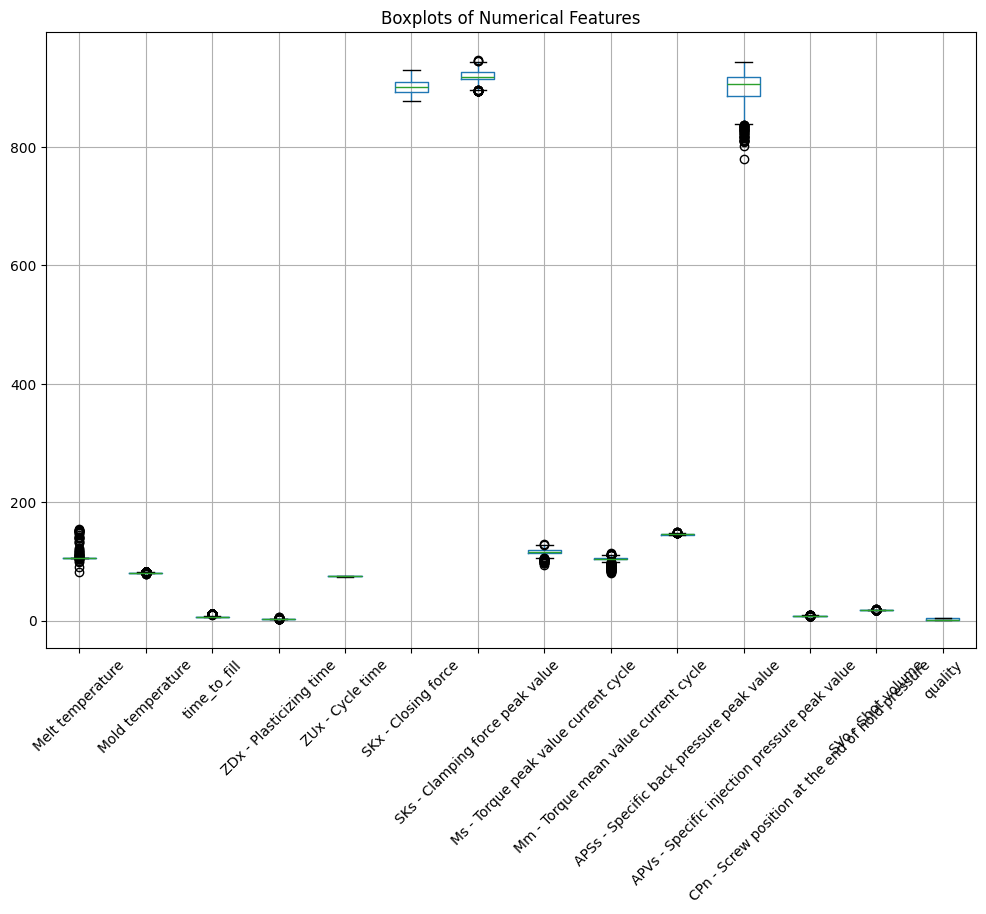

In [ ]:
# Boxplots for numerical features
plt.figure(figsize=(12, 8))
df.boxplot(rot=45)
plt.title("Boxplots of Numerical Features")
plt.show()


The boxplot shows that some features, like melt temperature, time to fill, plasticizing time, torque values, and specific injection pressure, have a lot of outliers. The reason may be unusual values,measurement errors,or just natural variations in the data.
Also some values like clamping force peak value and pecific back pressure peak value,seem skewek,it is meaning thire values not evently spred.Some features also have a wider range, showing more variation in their values. To handle this, we might need to scale the data, remove extreme outliers, or transform the skewed features for better model performance.This part will cover the data preparation process

##### **5.3 Chcek Distribution of the Data Using Histrogram**

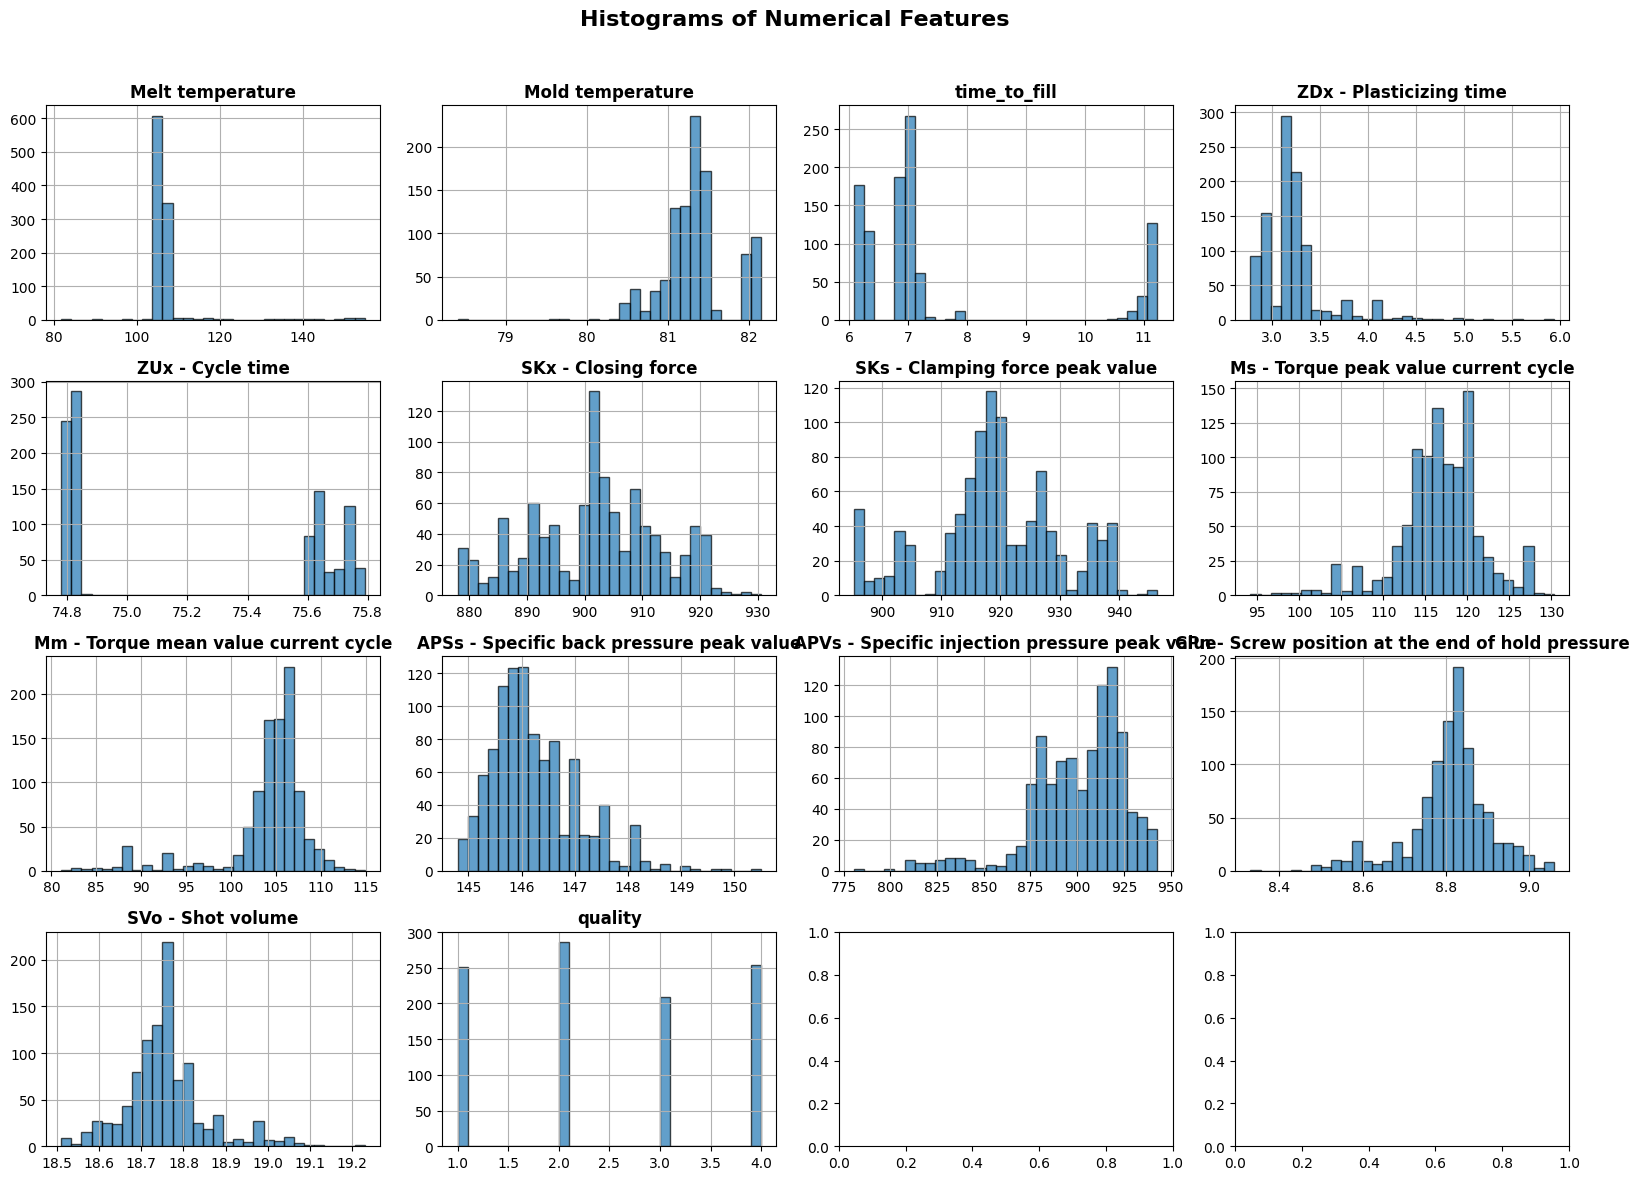

In [ ]:
# Set figure size and adjust layout for better clarity
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))  # Adjust grid size if needed
fig.suptitle("Histograms of Numerical Features", fontsize=16, fontweight="bold")

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate histograms for each numerical feature
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure it does not go out of bounds
        df[col].hist(ax=axes[i], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col, fontsize=12, fontweight="bold")
        axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title overlap
plt.show()


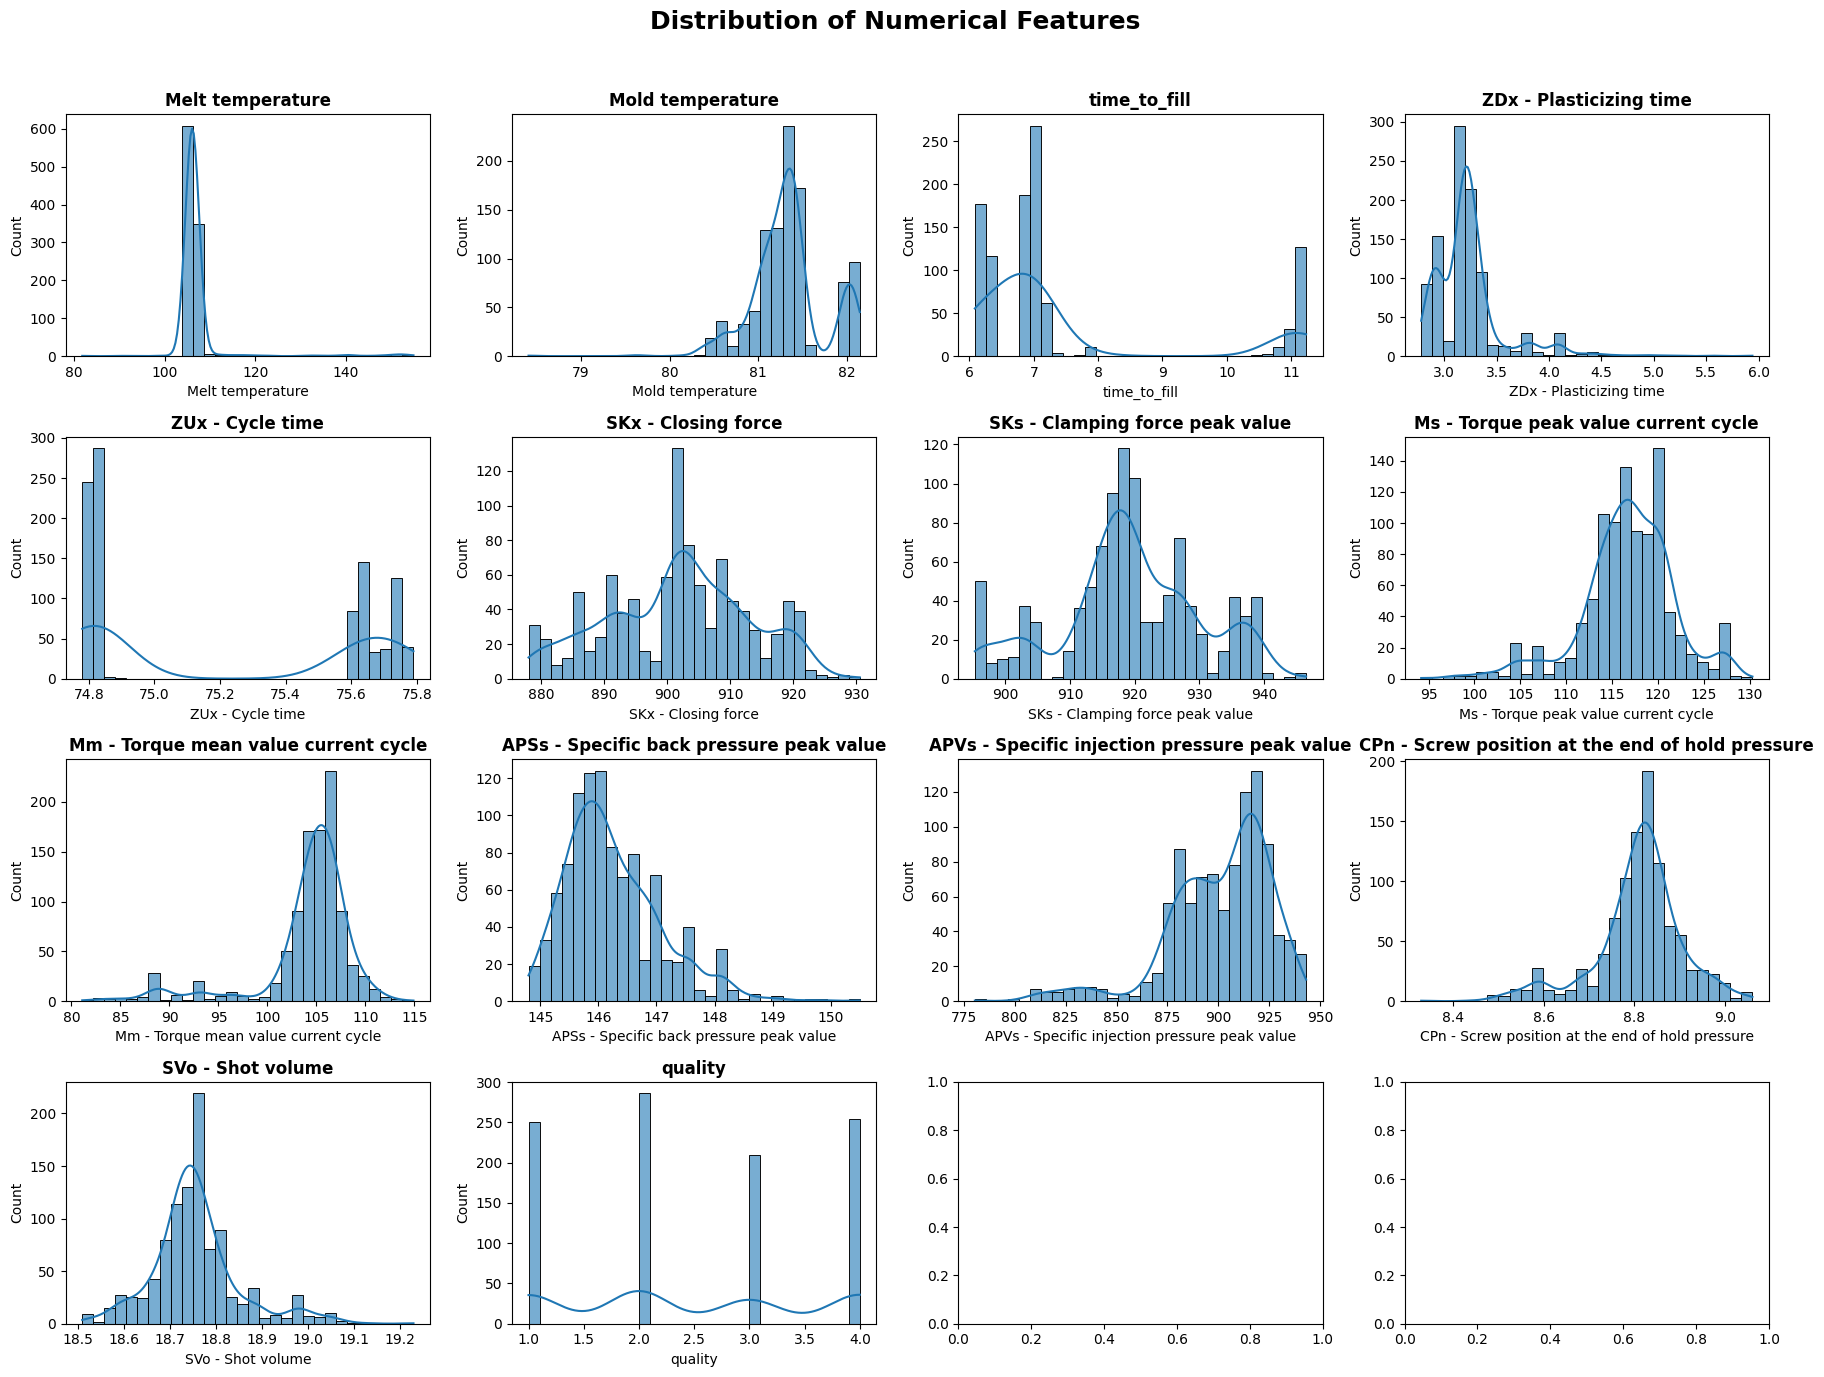

In [ ]:
# Set figure size and adjust layout for better clarity
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 14))  # Adjust grid size if needed
fig.suptitle("Distribution of Numerical Features", fontsize=18, fontweight="bold")

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate histograms with KDE for each numerical feature
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure it does not go out of bounds
        sns.histplot(df[col], ax=axes[i], bins=30, kde=True, edgecolor='black', alpha=0.6)
        axes[i].set_title(col, fontsize=12, fontweight="bold")
        axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevent title overlap
plt.show()


Looking at the above historograms, we can see most of the data is not perfectly balanced, some data sets have positive skewness, and some datasets have negative skewness. For example, "melt temperature" and "plasticizing time" have most of their values on the lower side, but they stretch out towards higher values, indicating positive skewness.

Also, if we check properly, we can see some features like "specific back pressure" and "torque values" seem to have more values on the higher side, with a tail extending rowards the the lower end,it reperesents negative skewness, Some features, like "shot volume reperesents fair balanced distribution.

Furthermore, the cycle time can be analysed further by examining the two peaks, which may indicate two different operating conditions. It is clear that the quality variable, which is the target for classification, can be divided into four categories, confirming the multiclass classification problem.

As a result of the above details, we can predict that the data is not evenly distributed across all features, which affects model performance directly. To handle this, we need todo normalization to make it more suitable for machine learning models. Normalization will be covered in the data preprocessing section.

##### **5.4 Chcek skewness , Kurtosis and Mode**

In [ ]:
# Import necessary functions from scipy.stats
from scipy.stats import skew, kurtosis

# Select only numeric columns
numeric_columns =df.select_dtypes(include=[np.number]).columns

# Calculate skewness and kurtosis for numeric columns
skewness = df[numeric_columns].apply(skew)
kurt = df[numeric_columns].apply(kurtosis)

# Calculate mode for numeric columns
modes = df[numeric_columns].apply(lambda col: col.mode().iloc[0] if not col.mode().empty else None)

# Create a DataFrame to store statistics
statistics_data = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt, 'Mode': modes})

# Display mode, skewness, and kurtosis statistics for each column
print(statistics_data)

                                                  Skewness   Kurtosis     Mode
Melt temperature                                  6.138765  40.274851  105.449
Mold temperature                                 -0.268426   2.836238   80.617
time_to_fill                                      1.565383   0.746203    6.968
ZDx - Plasticizing time                           2.631126  11.470740    3.160
ZUx - Cycle time                                  0.161217  -1.943144   74.810
SKx - Closing force                              -0.130958  -0.609911  908.600
SKs - Clamping force peak value                  -0.184803  -0.196182  918.200
Ms - Torque peak value current cycle             -0.681057   1.791736  120.500
Mm - Torque mean value current cycle             -2.211573   5.380279  104.300
APSs - Specific back pressure peak value          0.980283   1.398767  146.100
APVs - Specific injection pressure peak value    -1.262104   2.179489  882.300
CPn - Screw position at the end of hold pressure -0.

The skewness and kurtosis have some high values,such as melt temperature and plasticizing time,indicate the presence of extreme values.Other features,such as cycle time and clamping force peak value,show more symmetric and normal distrbution.For example, the most common melt temperature is 105.45°C, and the most frequent shot volume is 18.73, indicating stable process conditions for these parameters. The mode for quality is 2, suggesting that the majority of products fall into the "Acceptable" quality category. With this information, we can identify potential outliers and assess whether data transformations are needed to improve model performance.

In [ ]:
!pip install ydata_profiling

In [ ]:
"""from ydata_profiling import ProfileReport
from google.colab import files

# Generate the profile report
profile = ProfileReport(df, title="Plastic injection moulding EDA Report", explorative=True)

# Save the report as an HTML file
report_filename = "EDA_Report.html"
profile.to_file(report_filename)

# Download the report to your local machine
files.download(report_filename)

print(f"Report generated and saved as {report_filename}. You can download it now.")"""


'from ydata_profiling import ProfileReport\nfrom google.colab import files\n\n# Generate the profile report\nprofile = ProfileReport(df, title="Plastic injection moulding EDA Report", explorative=True)\n\n# Save the report as an HTML file\nreport_filename = "EDA_Report.html"\nprofile.to_file(report_filename)\n\n# Download the report to your local machine\nfiles.download(report_filename)\n\nprint(f"Report generated and saved as {report_filename}. You can download it now.")'

##### **5.5 Class Distribution of Target Variable**

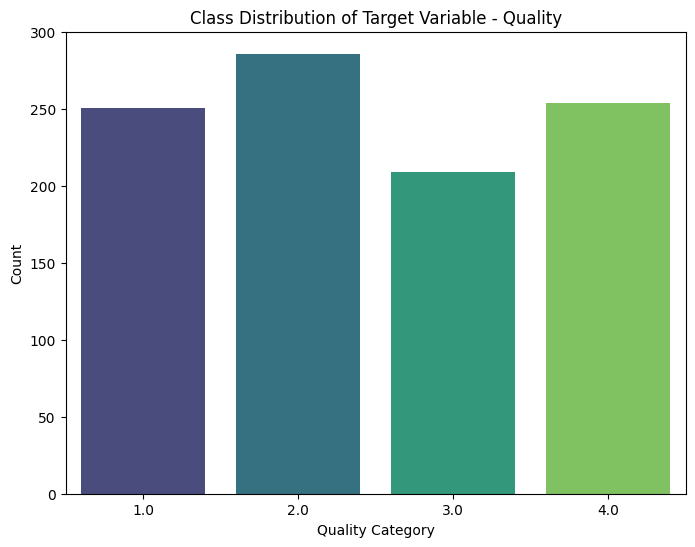

quality
2.0    286
4.0    254
1.0    251
3.0    209
Name: count, dtype: int64


In [ ]:
# Display class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Class Distribution of Target Variable - Quality")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()

# Print class distribution counts
print(df['quality'].value_counts())


According to the class distribution of the quality variable, the dataset is slightly imbalanced. For example, class 2(286 samples) is the most frequent, and class(209 samples) is the least.The important thing is that the imbalance is not extreme, because of that, standard machine-learning models should still perform reasonably well.

The model may predict the majority classes more accurately while struggling with the minority classes.We should use balanced metrics like F1-score and ensure a stratified train-test split in order to address this issue.

##### **5.6 Check the outliers in each variable**

Outliers in Melt temperature: 51
Outliers in Mold temperature: 229
Outliers in time_to_fill: 172
Outliers in ZDx - Plasticizing time: 83
Outliers in ZUx - Cycle time: 0
Outliers in SKx - Closing force: 0
Outliers in SKs - Clamping force peak value: 28
Outliers in Ms - Torque peak value current cycle: 44
Outliers in Mm - Torque mean value current cycle: 106
Outliers in APSs - Specific back pressure peak value: 18
Outliers in APVs - Specific injection pressure peak value: 41
Outliers in CPn - Screw position at the end of hold pressure: 91
Outliers in SVo - Shot volume: 106
Outliers in quality: 0


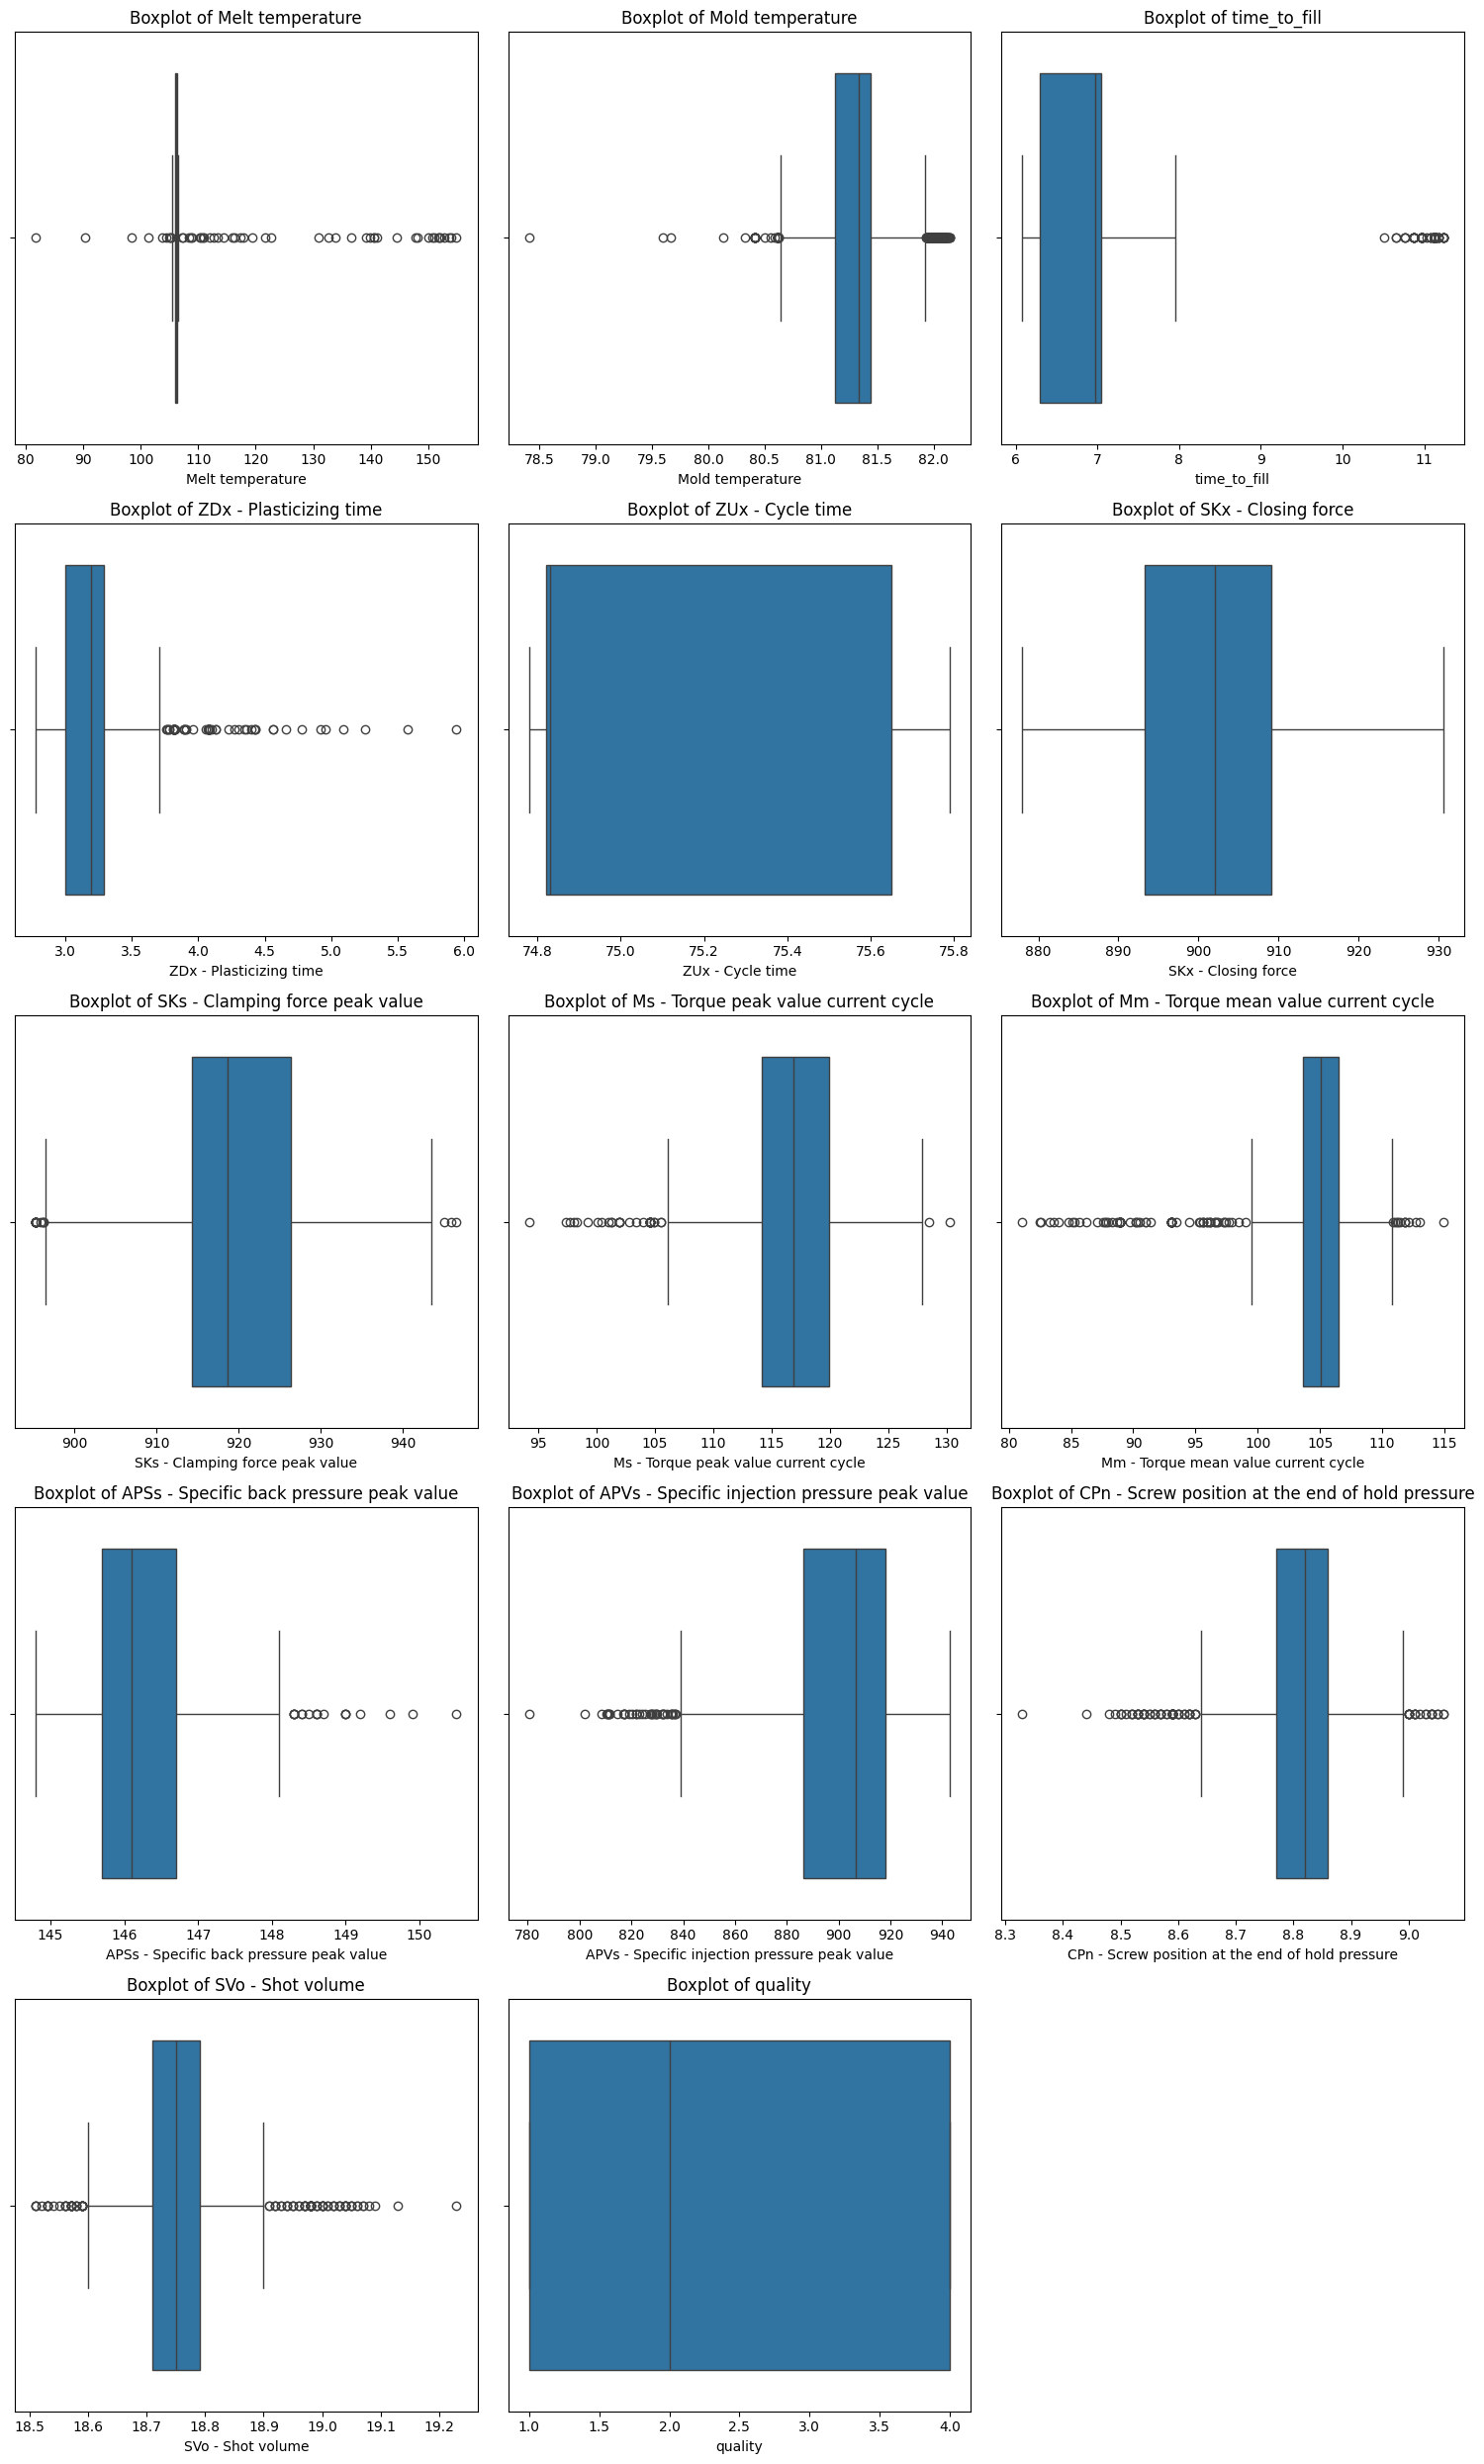

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in each numerical column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")

# Boxplot visualization with three plots per row
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_cols)
cols_per_row = 3
rows = (num_plots // cols_per_row) + (num_plots % cols_per_row > 0)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


The above boxplot represents the outlier of each variable and it visualises very clearly. Most of the columns exhibit outliers and indicate anomalies or deviations from normal patterns.

The most significant outlier count is shown in "Mold temperature(229)","time_to_fill(172)","CPn - Screw position at the end of hold pressure(91)","SVo - Shot volume(106)".

Some columns have no outliers for example "ZUx - Cycle time", "SKx - Closing force" and "quality".That means those are relatively stable distributions.

We need to handle the outliers because models like regression and artificial neural networks(ANN) are sensitive to outliers, as they try to minimise error, which could cause overfitting to extreme values. So outliers handling part cover in the data preprocessing part using IQR method because IQR method because IQR method well work for skewed distribution.

##### **5.7 Identify correlation metrix**

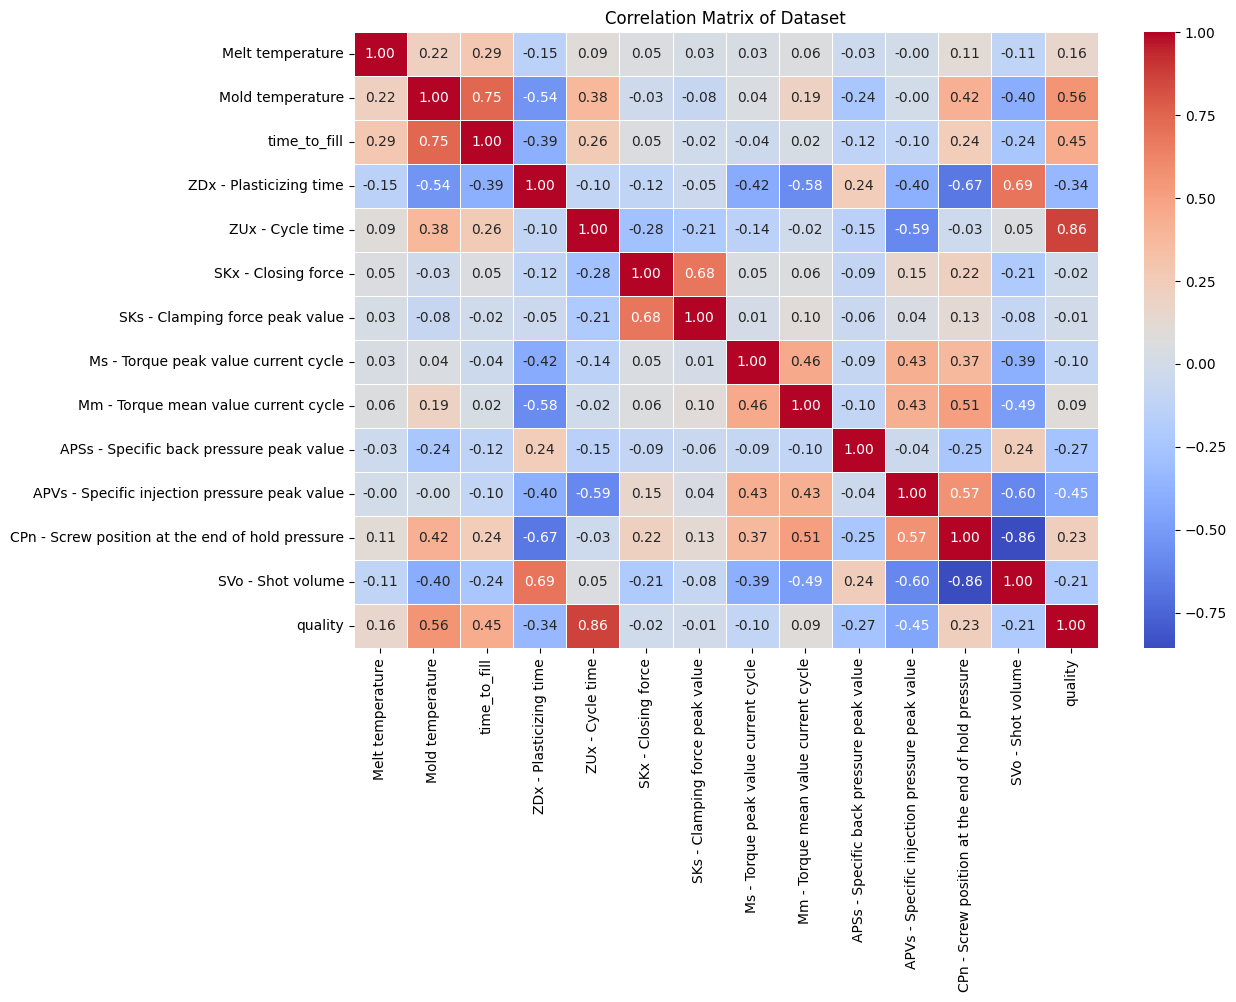

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Dataset")
plt.show()

| Feature 1           | Feature 2                                         | Correlation Value | Description |
|---------------------|--------------------------------------------------|------------------|-------------|
| time_to_fill       | Mold temperature                                | 0.745            | As Mold temperature increases, time_to_fill also tends to increase. |
| SVo - Shot volume  | CPn - Screw position at the end of hold pressure | -0.857           | As Screw position increases, Shot volume tends to decrease significantly. |
| quality            | ZUx - Cycle time                                | 0.864            | Higher cycle time is strongly associated with better quality classification. |


There is a strong relationship between these values, which can cause problems for some machine learning algorithms. Overfitting may occur as a result of the algorithm not being able to determine which features are most important in predicting the target variable.

It is possible to address this problem by using Principal Component Analysis (PCA). Compared to linear models, tree-based models handle multicollinearity better, but may still suffer from misleading feature importance scores. When data is handled properly, models are more interpretable, stable, and generalisable to new datasets.


#<font color="green"> **6.Data Pre-processing**

According to the process we need to handle the missing values and remove duplicate rows however based on EDA process I have idenfied there is no any outliers and duplicates in the dataset so based on that I do not need to work on the outliers and duplicates. That mean dataset is more consistent, reliable and easier to analyse.

##### **6.1 Identify and Remove Inconsistencies**

In the data preprocessing phase, identifying and removing inconsistencies is critical, especially for high-stakes applications like manufacturing quality prediction. Data inconsistencies-such as duplicates, contradictory values, or incorrect formats-can severely skew machine learning models' performance. As an example, if the same input features produce both "Waste" and "Target" quality labels in the same instance, the learning algorithm gets confused and model accuracy is reduced. IoT-driven environments can be plagued by human errors in data entry, sensor malfunctions, and system noise. Especially when categorizing products into nuanced categories like “Acceptable” versus “Unacceptable,” cleaning such inconsistencies ensures data integrity, promotes better generalization in the model, and boosts prediction reliability. In engineering contexts where each parameter (e.g., injection pressure, mould temperature) has real-world implications, the data is aligned with domain knowledge, which is essential.

In [ ]:
# Check initial shape
print("Original dataset shape:", df.shape)

# Define columns with physical constraints
invalid_cols = ['time_to_fill', 'ZDx - Plasticizing time', 'ZUx - Cycle time', 'Ms - Torque peak value current cycle']

# Remove rows with zero or negative values
for col in invalid_cols:
    df = df[df[col] > 0]

# Check new shape
print("Cleaned dataset shape:", df.shape)


Original dataset shape: (1000, 14)
Cleaned dataset shape: (1000, 14)


In [ ]:
# Columns to validate
invalid_cols = ['time_to_fill', 'ZDx - Plasticizing time', 'ZUx - Cycle time', 'Ms - Torque peak value current cycle']

# Create a summary table
invalid_summary = pd.DataFrame({
    'Feature': invalid_cols,
    'Invalid_Count (≤ 0)': [ (df[col] <= 0).sum() for col in invalid_cols ],
    'Invalid_Percentage (%)': [ round((df[col] <= 0).mean() * 100, 2) for col in invalid_cols ]
})

display(invalid_summary)


,Feature,Invalid_Count (≤ 0),Invalid_Percentage (%)
0,time_to_fill,0,0.0
1,ZDx - Plasticizing time,0,0.0
2,ZUx - Cycle time,0,0.0
3,Ms - Torque peak value current cycle,0,0.0


Manufacturing datasets, such as those used to predict product quality in plastic injection moulding, must adhere to real-world physical laws. Measureable physical quantities such as time_to_fill, plasticizing time, cycle time, and torque peak value current cycle are represented by variables like time_to_fill, ZDx, and ZUx. There can be no logical way for these values to be zero or negative under normal operating conditions. Having a cycle time of 0 seconds or a torque of 0 would indicate data recording error, sensor failure, or a data entry error.



To identify rows with zero or negative values which are physically implausible in the context of plastic injection moulding, a preliminary check was conducted on critical process features such as time_to_fill, ZDx - Plasticizing time, ZUx - Cycle time, and Ms - Torque peak value current cycle. However, we found no such inconsistencies, confirming that all data points were within acceptable operational ranges. At this stage, there is no need to conduct aggressive cleaning since the dataset is of high quality.

##### **6.2 Outlier Detection Using KNN and LOF and remove them**

A distance-based outlier detection technique such as K-Nearest Neighbors (KNN) or Local Outlier Factor (LOF) would be highly appropriate for this dataset to ensure data quality and improve model performance. A multiclass target variable representing product quality is included in this dataset, derived from plastic injection moulding processes. Continuous numerical features include injection pressure, cycle time, and temperature. As a result of process irregularities, real-world industrial datasets like this often contain noise or anomalies.

This method identifies outliers by calculating the distance between each point and its k-nearest neighbors, and flagging isolated instances that deviate from the general pattern. Particularly well-suited to continuous, low-dimensional data, it allows for the detection of abnormal process cycles that could lead to defects.

While LOF enhances this by comparing the local density of each point with that of its neighbors, which is ideal for scenarios where certain process settings are used more frequently, resulting in denser clusters. Because of this, LOF is particularly effective at identifying contextual outliers, such as high-quality products manufactured with atypical parameter combinations. By combining these methods, we are not only able to improve data quality, but also create robust machine learning models.

| **Model**        | **Strengths**                                                                                      | **Suitability for Your Dataset**                                                                 |
|------------------|----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| **ANN**          | Learns complex, non-linear relationships between process parameters and product quality.           | Outlier removal via KNN/LOF helps avoid convergence issues and improves generalization.           |
| **Random Forest**| Ensemble-based, handles noise well, offers feature importance insights.                            | Benefits from outlier removal to improve accuracy and interpretability.                          |
| **AdaBoost**     | Boosting technique that’s sensitive to data quality and noise.                                     | Performs better when trained on clean, balanced data — outlier removal is crucial.              |
| **Decision Tree**| Easy to interpret, handles non-linear splits well.                                                 | Prone to overfitting on outliers; cleaning helps trees split meaningfully.                      |
| **SVM**          | High-performance with well-separated classes but **very sensitive to outliers**.                  | Distance-based outlier removal (LOF/KNN) is critical to avoid distorted decision boundaries.     |


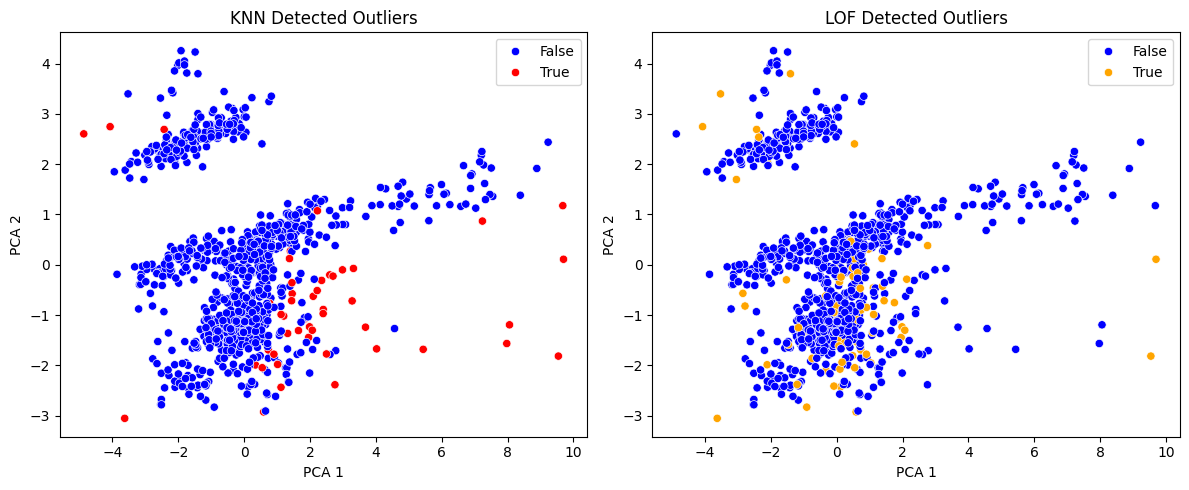

Original shape: (1000, 14)
Cleaned shape: (919, 14)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors

# Separate features and target
X = df.drop(columns=["quality"])
y = df["quality"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. KNN Outlier Detection
k = 5

knn = NearestNeighbors(n_neighbors=k)
knn.fit(X_scaled)

# Distance to k-th nearest neighbor
distances, indices = knn.kneighbors(X_scaled)
k_distances = distances[:, -1]  # take distance to the k-th nearest neighbor

# Set threshold (optional: use quantile)
threshold_knn = np.percentile(k_distances, 95)
outliers_knn = k_distances > threshold_knn

# 2. Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=k)
y_pred_lof = lof.fit_predict(X_scaled)
outliers_lof = y_pred_lof == -1

# Visualize Outliers
# -------------------------
# Create 2D projection for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting KNN Outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outliers_knn, palette={False: "blue", True: "red"})
plt.title("KNN Detected Outliers")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Plotting LOF Outliers
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outliers_lof, palette={False: "blue", True: "orange"})
plt.title("LOF Detected Outliers")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

# Optional: Remove Outliers

# Choose one method: e.g., LOF
df_cleaned = df[~outliers_lof].reset_index(drop=True)

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)


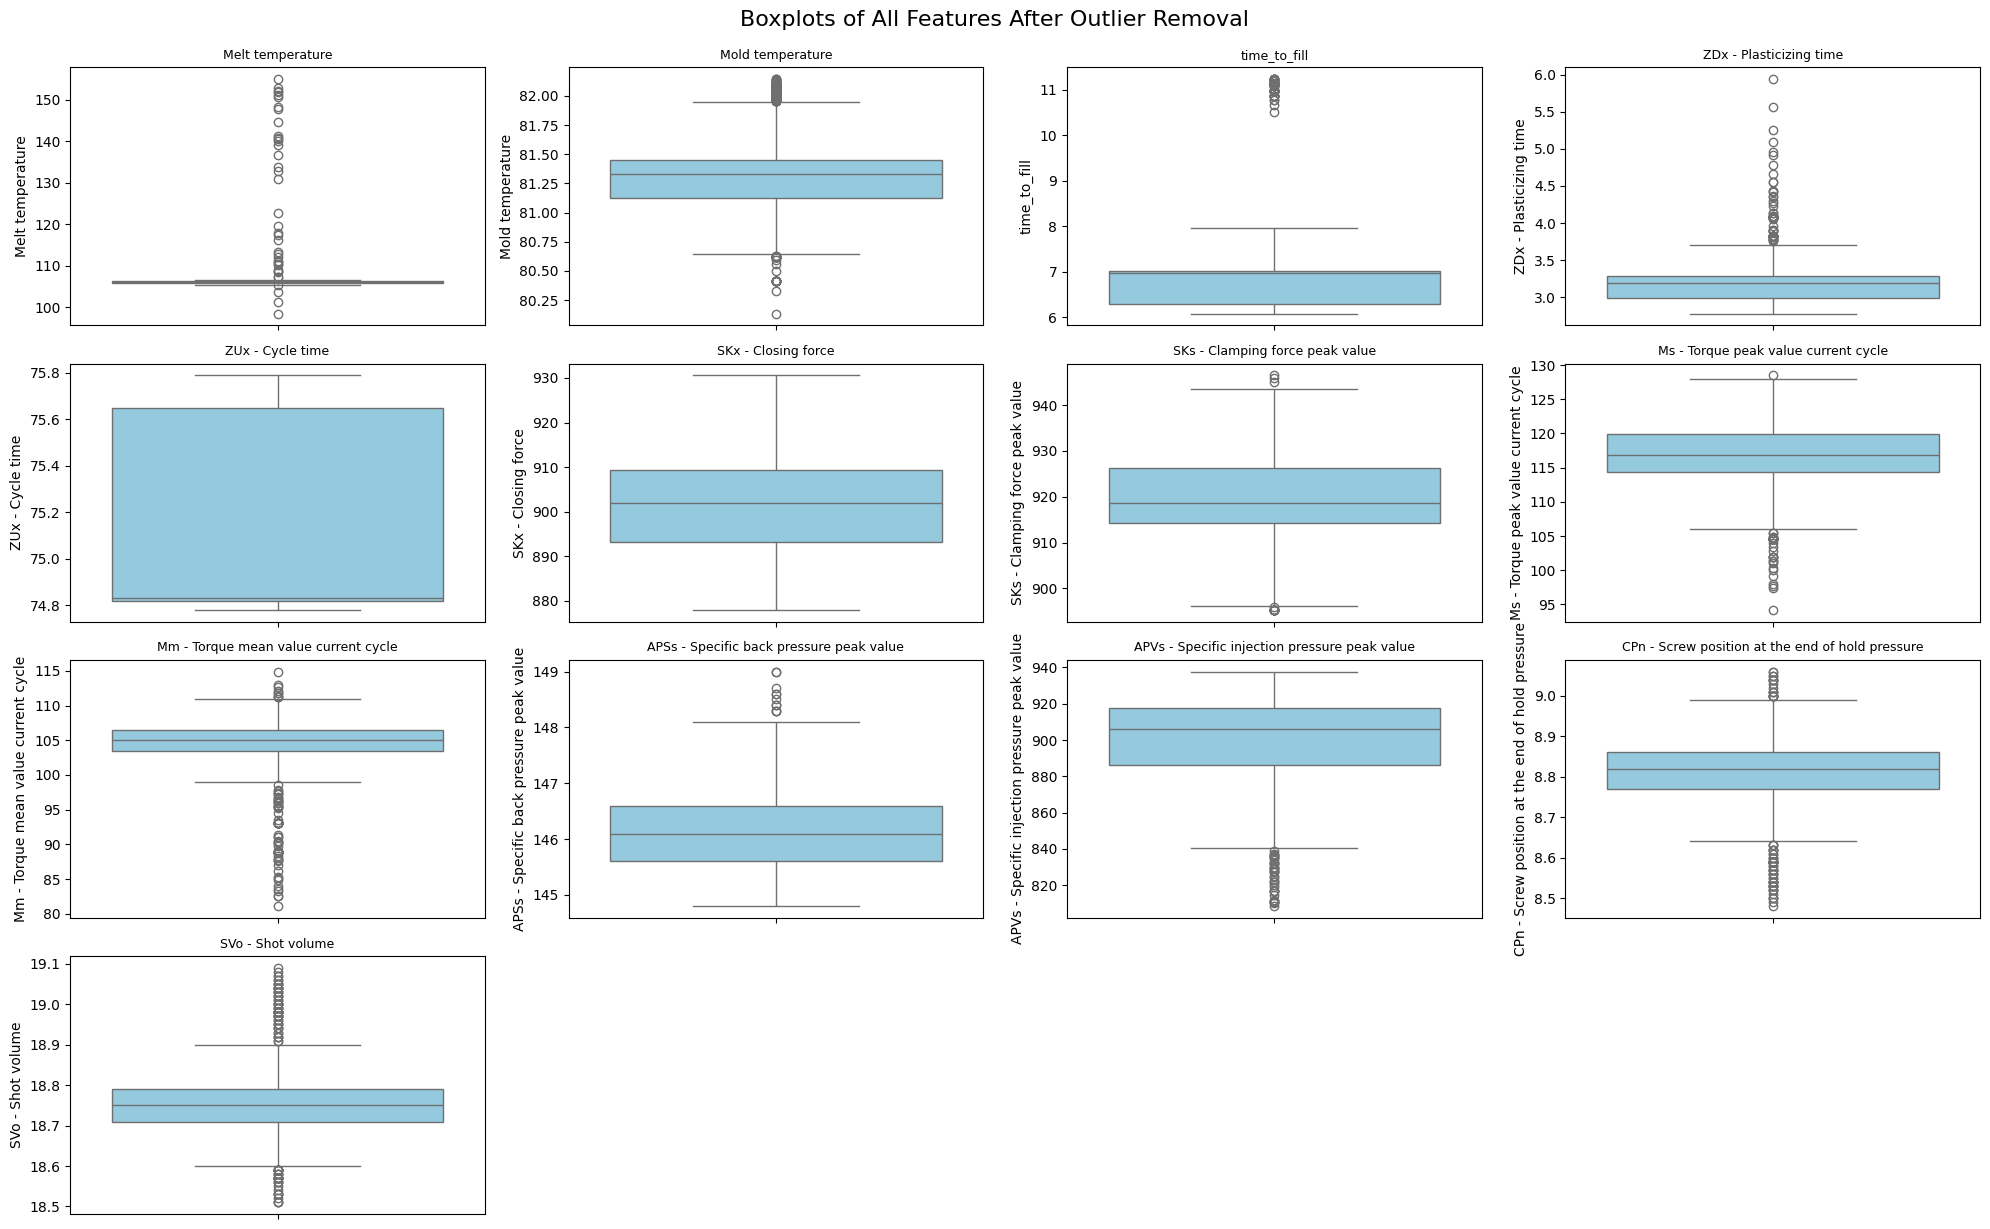

In [ ]:

# Drop target column 'quality' since it's categorical
features_only = df_cleaned.drop(columns=['quality'])

# Set figure size
plt.figure(figsize=(20, 12))

# Create one subplot per feature
for i, col in enumerate(features_only.columns):
    plt.subplot(4, 4, i + 1)  # Adjust rows/cols depending on number of features
    sns.boxplot(data=features_only[col], orient='v', color='skyblue')
    plt.title(col, fontsize=9)
    plt.tight_layout()

plt.suptitle("Boxplots of All Features After Outlier Removal", fontsize=16, y=1.02)
plt.show()


Following the application of LOF-based cleaning, boxplots were generated for each numerical feature in order to visually confirm the effectiveness of the outlier detection process. Most anomalous data points have been successfully removed from the plots as they show tighter distributions with fewer extreme values. Additionally, this step identified possible skewness in some variables, which could guide future feature transformations or scaling decisions

The LOF was applied to remove density-based anomalies, but boxplot visualizations still show points outside the whiskers, which is expected since boxplots define outliers based on interquartile range (IQR), not density. In order to preserve natural variance, we retained the remaining points which represent statistically extreme values, but may not be true anomalies.

##### **6.3 Feature Scaling with StandardScaler**


KNN and LOF are distance based methods and relay on how far a point is from others. This was covered in process 6.2 (Outlier Detection Using KNN and LOF).

Without scaling, a large-scale feature (like injection pressure) could dominate the distance calculation, leading to biased detection.Therefore, the process 6.2 covers feature scaling with standardScaler.


In order to ensure that the few features are visible before and after scaling.

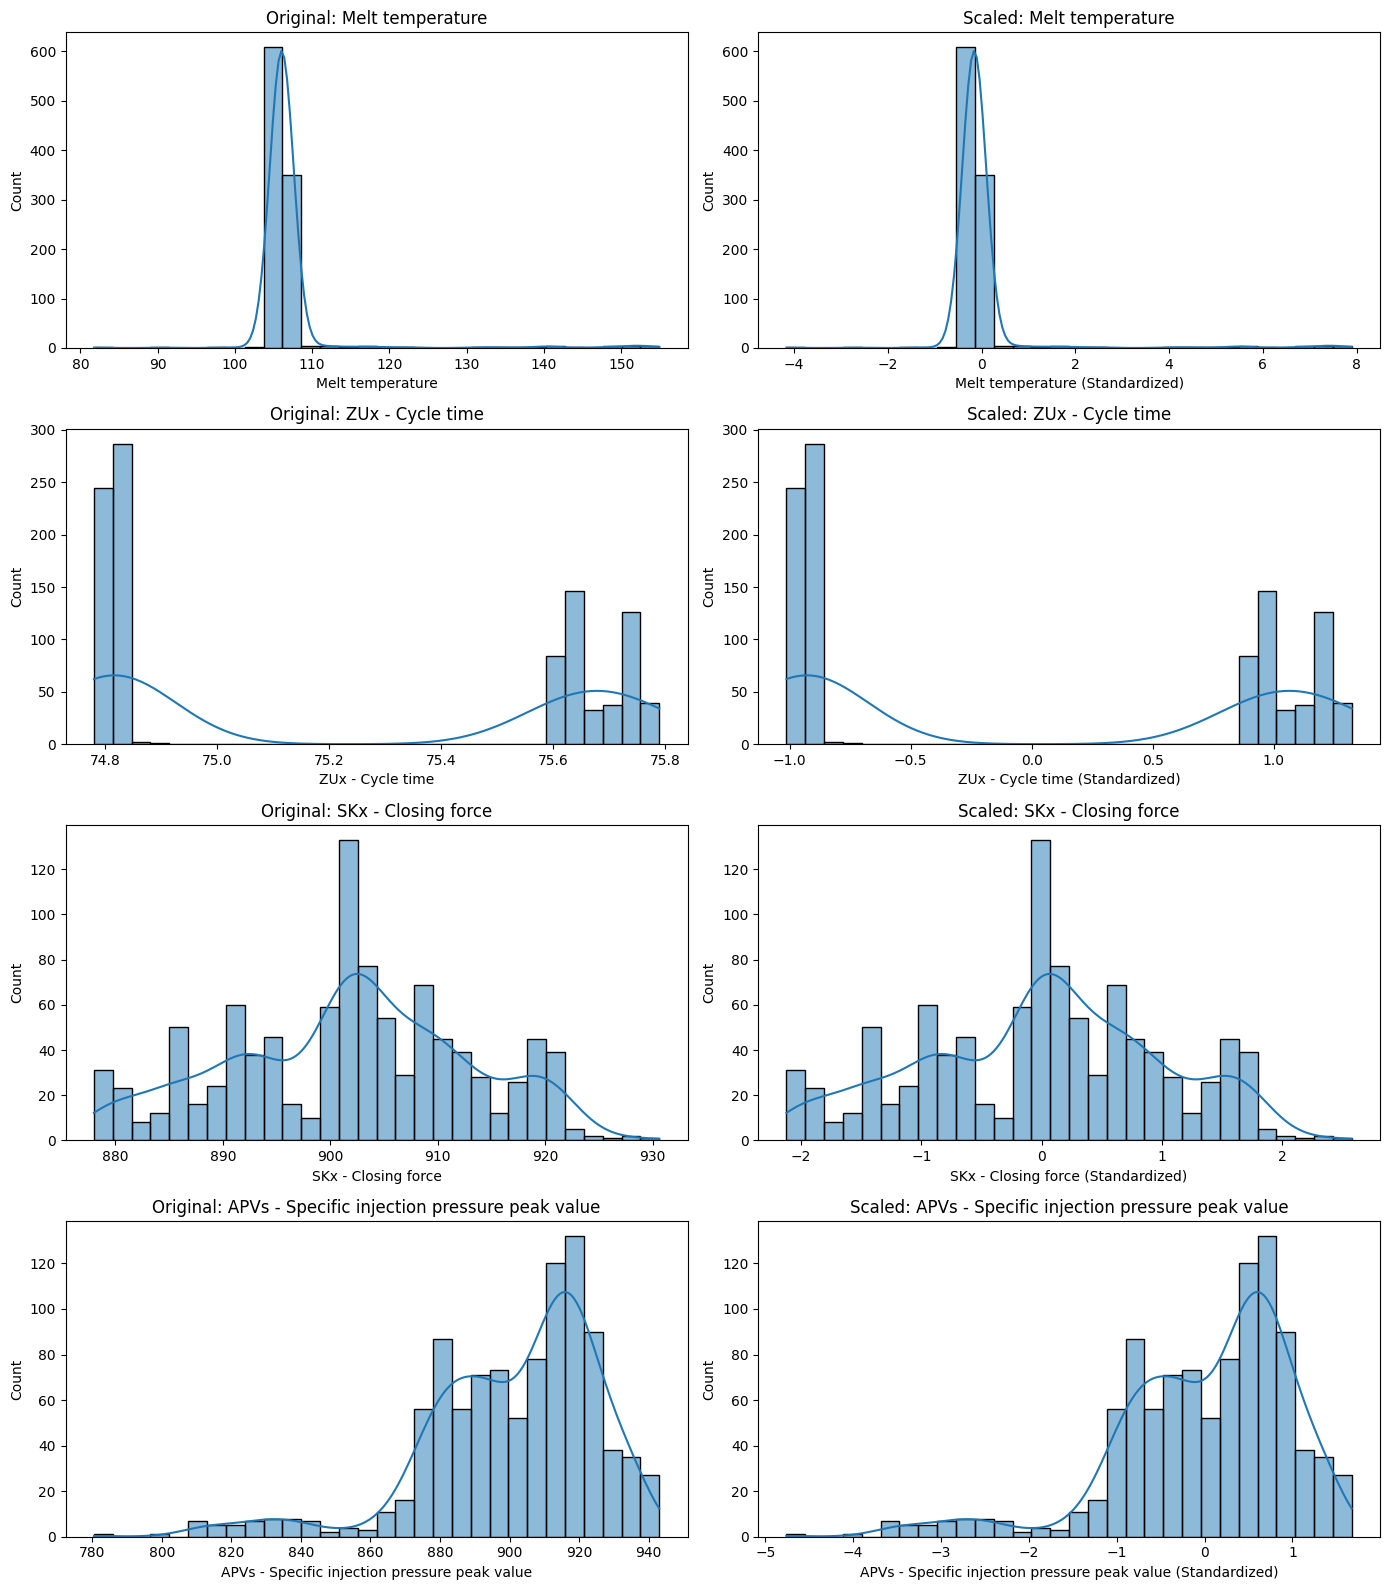

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Choose a few features to compare
features_to_plot = [
    'Melt temperature',
    'ZUx - Cycle time',
    'SKx - Closing force',
    'APVs - Specific injection pressure peak value'
]

# Re-create scaled DataFrame from earlier step
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Set up the plot
plt.figure(figsize=(14, len(features_to_plot) * 4))

for i, feature in enumerate(features_to_plot):
    # Plot original
    plt.subplot(len(features_to_plot), 2, 2*i + 1)
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f"Original: {feature}")
    plt.xlabel(feature)

    # Plot scaled
    plt.subplot(len(features_to_plot), 2, 2*i + 2)
    sns.histplot(X_scaled_df[feature], kde=True, bins=30)
    plt.title(f"Scaled: {feature}")
    plt.xlabel(feature + " (Standardized)")

plt.tight_layout()
plt.show()


As can be seen in the above visual comparison, the distribution of selected features is standardized as opposed to the original version which exhibited varying ranges and skewnesses. This helps improve the performance and convergence of the model.

##### **6.3 Check for Multicollinearity Using Correlation + VIF**

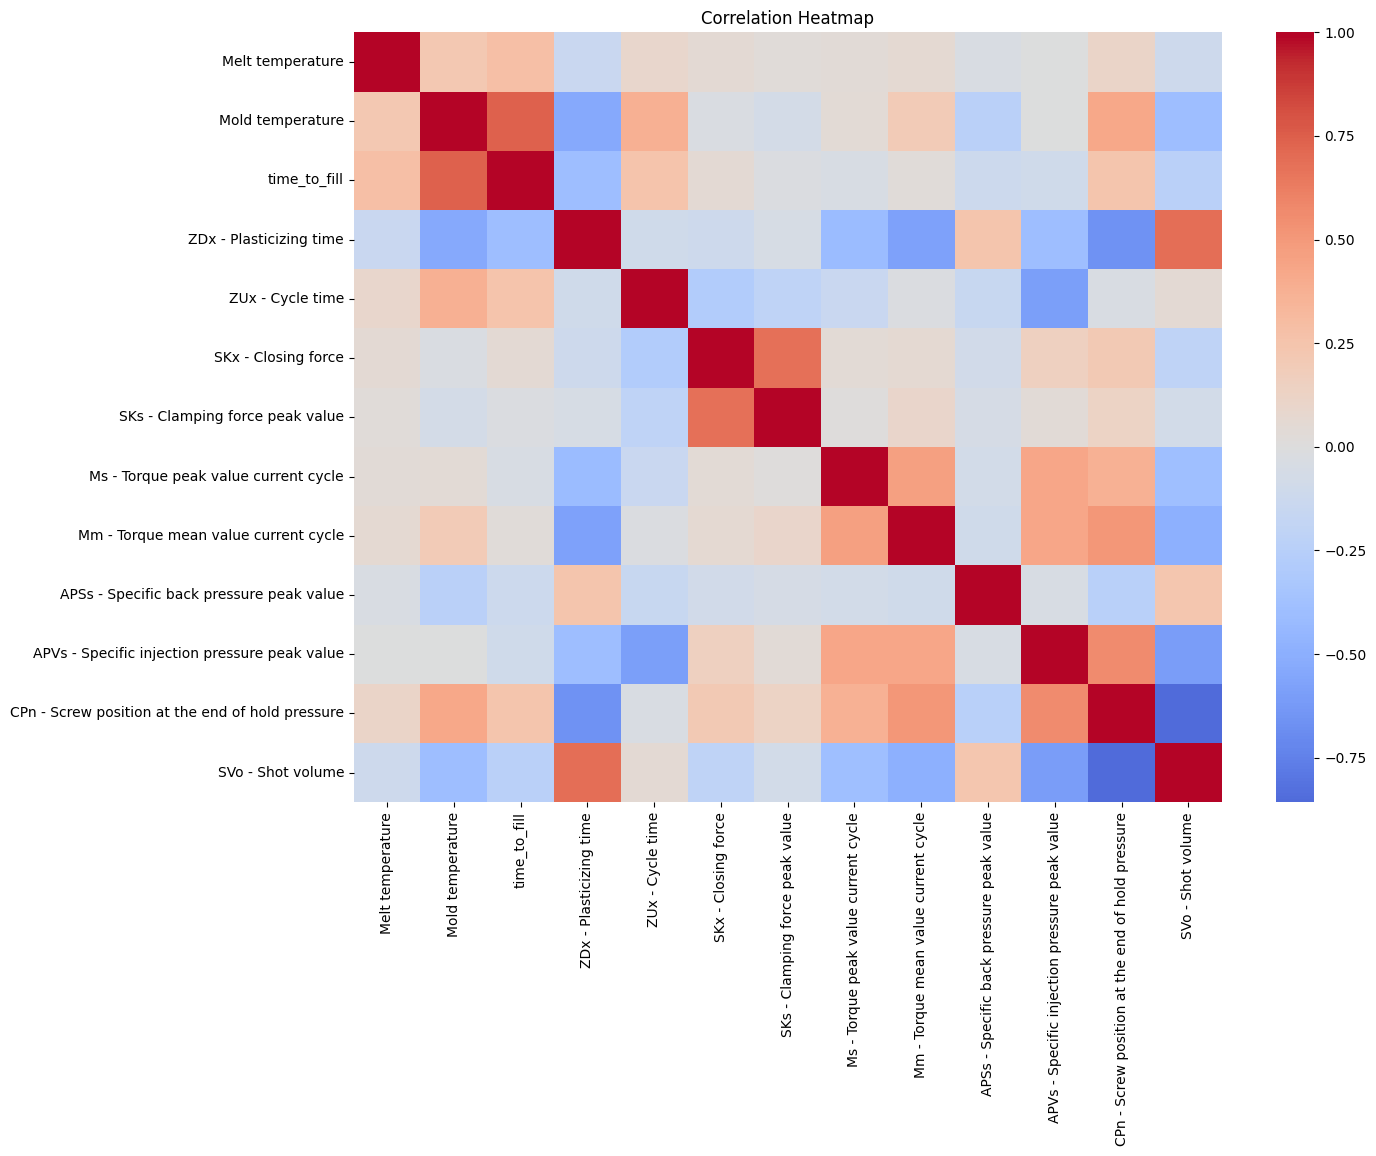

                                             Feature       VIF
12                                 SVo - Shot volume  4.646876
11  CPn - Screw position at the end of hold pressure  4.372568
10     APVs - Specific injection pressure peak value  3.958442
1                                   Mold temperature  3.248230
3                            ZDx - Plasticizing time  2.922457
4                                   ZUx - Cycle time  2.718630
2                                       time_to_fill  2.606343
5                                SKx - Closing force  2.110260
6                    SKs - Clamping force peak value  1.989647
8               Mm - Torque mean value current cycle  1.867780
7               Ms - Torque peak value current cycle  1.467016
9           APSs - Specific back pressure peak value  1.131163
0                                   Melt temperature  1.096229


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Use scaled features as input
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# -------------------------------
# 1. Correlation Matrix (Heatmap)
# -------------------------------
plt.figure(figsize=(14, 10))
sns.heatmap(X_scaled_df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 2. Variance Inflation Factor (VIF)
# -------------------------------
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Display VIF
print(vif_data.sort_values(by="VIF", ascending=False))


We checked for multicollinearity among the input features using Variance Inflation Factor (VIF) analysis. All features had VIF values below 5, which means there aren't any strong linear dependencies between them. The feature with the highest VIF was SVo – Shot volume (4.65), followed by CPn – Screw position at the end of hold pressure (4.37). Since none of the features exceeded the commonly accepted threshold of 10, we kept all features. This confirms that our current feature set is suitable for model development, especially for algorithms sensitive to multicollinearity, such as SVM and ANN.

##### **6.3 Encode the Target Variable (Label Encoding / One-Hot)**

A variable called "quality" is a multiclass categorical variable ("Waste","Target","Acceptable","Inefficient"), and it needs to be converted into a numerical variable.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_cleaned["quality"])


In [ ]:
# Print label mappings
for label, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{label} ➝ {encoded}")


1.0 ➝ 0
2.0 ➝ 1
3.0 ➝ 2
4.0 ➝ 3


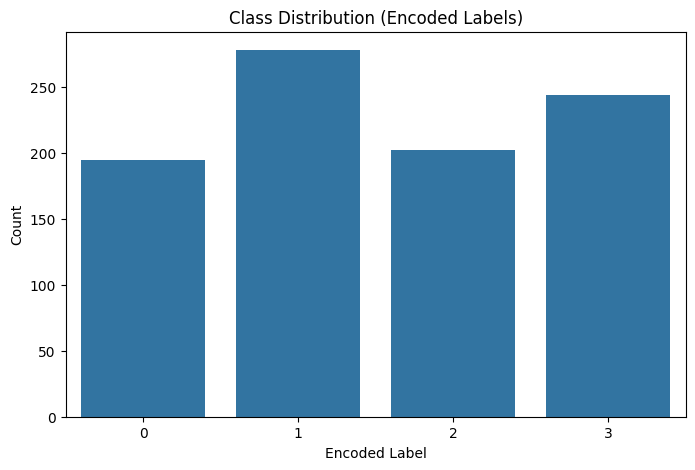

In [ ]:
import pandas as pd

# Wrap encoded y into a Series for visualization
y_encoded_series = pd.Series(y_encoded, name="Encoded Quality")

plt.figure(figsize=(8, 5))
sns.countplot(x=y_encoded_series)
plt.title("Class Distribution (Encoded Labels)")
plt.xlabel("Encoded Label")
plt.ylabel("Count")
plt.show()


##### **6.4 Data Splitting (85/15 + 10-fold CV Ready)**

According to the coursework requirement the dataset has splited in to:


*   85% training set for model development and cross-validation
*   15% test set reserved for final model evaluation



#<font color="green"> **7.Hypothesis Testing & ANOVA**

##### **7.1 One-way ANOVA Testing**

Analysis of Variance (ANOVA) was used to determine the statistical relationship between product quality and process parameters. We aimed to determine whether the mean values of each numerical feature differ significantly across the four quality classes: Acceptable, Target, Waste, and Inefficient.

One-way ANOVA was selected for this dataset because it consists of multiple continuous numerical features (example: injection pressure,cycle time,temperature ) and a categorical target variable "quality" with four distinct classes:Acceptable, Target, Waste, and Inefficient.

This context requires a one-way ANOVA since it evaluates the effects of a single categorical variable on continuous outcomes, one feature at a time. Prior to model development, this method allows identifying features that differ statistically significantly across classes, which facilitates exploratory analysis and feature selection.

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Assume df_cleaned is your cleaned dataset
# quality must be the original categorical column (not label-encoded)
anova_results = {}

for col in df_cleaned.columns:
    if col != "quality":
        groups = [df_cleaned[df_cleaned["quality"] == group][col] for group in df_cleaned["quality"].unique()]
        stat, p = f_oneway(*groups)
        anova_results[col] = {'F-statistic': stat, 'p-value': p}

# Convert to DataFrame for display
anova_df = pd.DataFrame(anova_results).T
anova_df["Significant"] = anova_df["p-value"] < 0.05  # Flag significance

print(anova_df.sort_values(by="p-value"))


                                                   F-statistic        p-value  Significant
ZUx - Cycle time                                  13611.960696   0.000000e+00         True
Mold temperature                                    309.429882  1.190155e-138         True
APVs - Specific injection pressure peak value       243.419025  4.269940e-116         True
time_to_fill                                        194.899312   1.017711e-97         True
SVo - Shot volume                                   191.214671   2.985519e-96         True
CPn - Screw position at the end of hold pressure    184.128030   2.128122e-93         True
ZDx - Plasticizing time                             172.045482   1.942940e-88         True
SKx - Closing force                                 141.548312   2.437255e-75         True
SKs - Clamping force peak value                      97.787937   6.634048e-55         True
APSs - Specific back pressure peak value             35.114252   1.749076e-21         True

Each numerical feature was compared against the categorical target variable quality, which has four categories: Waste, Acceptable, Target, and Inefficient. A null hypothesis (H0) proposes that all quality groups have equal means, while an alternative hypothesis (H1) proposes that at least one group differs significantly.

According to the results of the ANOVA, all tested features showed statistically significant differences across quality classes, with p-values well below the standard threshold of 0.05. Among them were:



*   ZUx – Cycle Time (F = 13,611.96, p < 0.00001)

*   Mold Temperature (F = 309.42, p = 1.19e-138)
*  Specific Injection Pressure Peak Value (F = 243.42, p = 4.27e-116)











In addition to providing a strong statistical foundation for the subsequent machine learning models, these findings also confirm process variables play a significant role in determining product quality. Additionally, the ANOVA insight aligns with domain knowledge, since temperature, pressure, and timing play a significant role in the quality of plastic moulding.

##### **7.2 Barplot (p-values)**

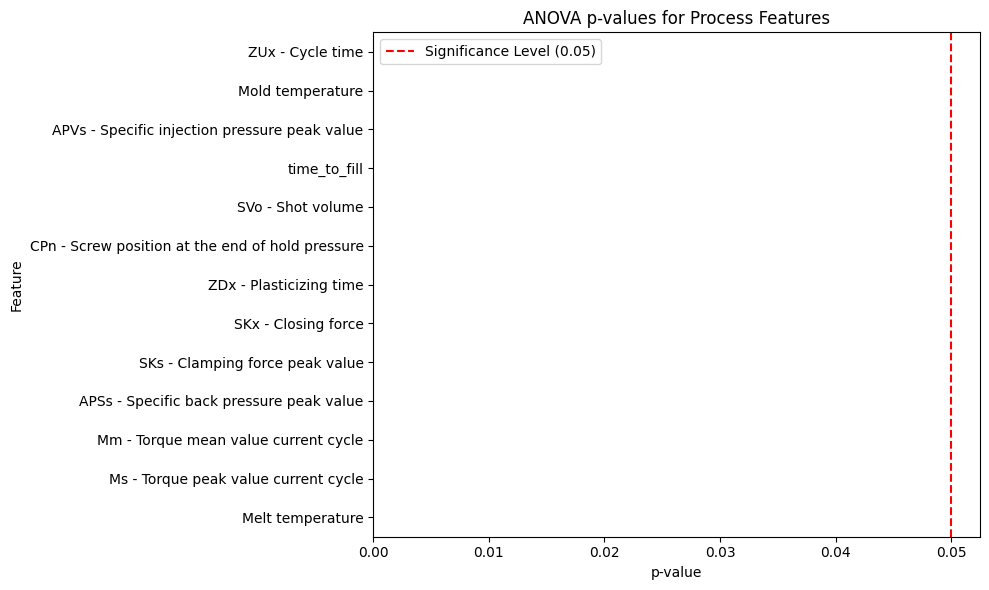

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=anova_df.sort_values("p-value")["p-value"],
            y=anova_df.sort_values("p-value").index, palette="viridis")
plt.axvline(0.05, color="red", linestyle="--", label="Significance Level (0.05)")
plt.title("ANOVA p-values for Process Features")
plt.xlabel("p-value")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()  # Zoom into the tiny p-value range
plt.show()


ANOVA results showed highly significant differences between quality classes for all process parameters involving very small p-values (e.g., 0.000001). Consequently, the p-value plot appears visually compressed at the left side of the chart. It is apparent from this that each feature distinguishes between product quality outcomes with a high level of statistical significance.

##### **7.3  Boxplots (for top 2 features)**

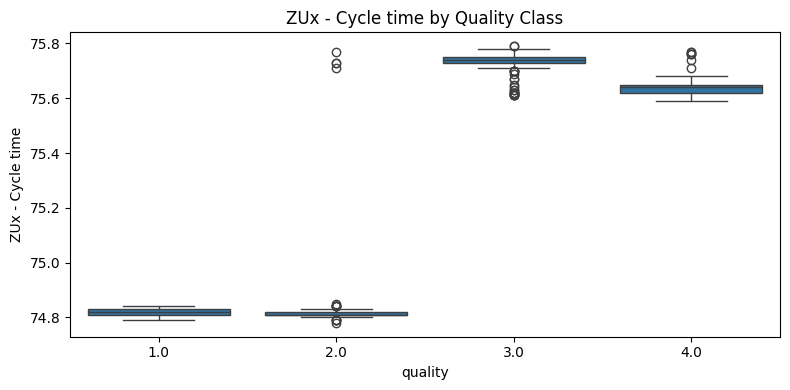

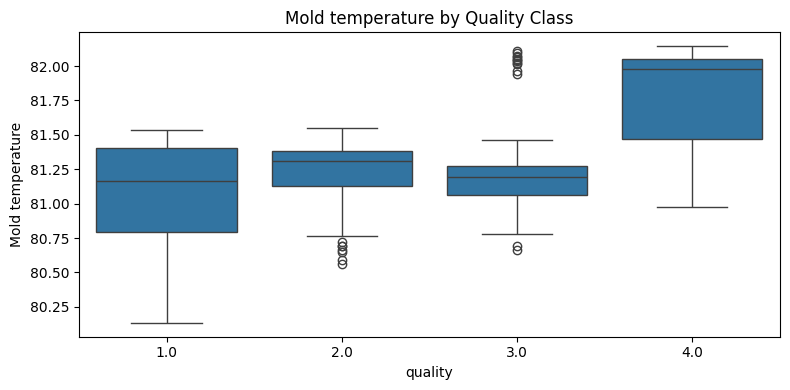

In [ ]:
top_features = anova_df.sort_values("p-value").head(2).index

for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="quality", y=feature, data=df_cleaned)
    plt.title(f"{feature} by Quality Class")
    plt.tight_layout()
    plt.show()


Further illustrating the differences found by ANOVA, boxplots were created for ZUx - Cycle Time and Mold Temperature, the two most statistically significant features. Using these visualizations, you can see how each feature is distributed across the four product quality classes.



*   There is a distinct cluster in the median and overall range for ZUx - Cycle Time, as well as a clear separation between quality groups. Based on the ANOVA result, this feature has the highest discriminatory power (p-value = 0).

*   It is clear to see that the medians and variation between the quality classes for Mold Temperature are noticeably different, despite the fact that the class distributions slightly overlap. As a result, it is statistically significant and relevant for training models.


ANOVA results are visually validated by boxplots, which reinforces how important these features are in predicting product quality. As a result, the machine learning models developed later in this study are justified in including these patterns.

#<font color="green"> **8.Machine Learning Model Development**

##### **8.1  Train/Test Split (85/15)**

According to my coursework specification,the dataset has splited using this the following strategy:


*   85% of the data was allocated for training the machine learning models.
*   15% of the data was held out as a test set for final model evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X_final = df_cleaned.drop(columns=["quality"])
y_final = label_encoder.transform(df_cleaned["quality"])

# Perform 85/15 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.15,
    random_state=42,
    stratify=y_final
)

# Output shape verification
print("Training set:", X_train.shape, y_train.shape)
print("Testing set :", X_test.shape, y_test.shape)


Training set: (781, 13) (781,)
Testing set : (138, 13) (138,)


##### **8.2  Model Selection**

In order to categorise products into four quality categories, five machine-learning classification models were selected based on coursework specifications. All selected models are suitable for multiclass classification and offer complementary advantages.

1. **Artificial Neural Network (ANN)**  
   ANN models are capable of capturing complex nonlinear relationships between input features and outputs, making them ideal for high-dimensional and intricate data like that in industrial production processes. They are well-suited to multiclass problems and can generalize well when tuned properly.

2. **Random Forest (RF)**  
   RF is an ensemble learning method that builds multiple decision trees and combines their predictions. It is robust to noise and overfitting, handles both categorical and numerical data well, and naturally supports multiclass classification. Its ability to provide feature importance is valuable for interpretability.

3. **AdaBoost**  
   AdaBoost is a boosting algorithm that combines weak learners (usually decision trees) to form a strong classifier. It works well on classification tasks by focusing on difficult examples, improving performance iteratively. While not inherently multiclass, AdaBoost can be extended to such tasks using `SAMME` or `SAMME.R`.

4. **Decision Tree (DT)**  
   DTs are simple yet powerful classifiers that split the data using feature-based conditions. They are easy to interpret, fast to train, and can handle multiclass labels directly. However, they may be prone to overfitting if not pruned.

5. **Support Vector Machine (SVM)**  
   SVMs perform well in high-dimensional spaces and aim to find the hyperplane that best separates the classes. For multiclass classification, a One-vs-Rest (OvR) or One-vs-One (OvO) strategy is used. SVMs can be sensitive to scaling but provide strong performance with the right kernel and parameters.


In [ ]:
# Imports
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Dictionary to hold all models for training/evaluation
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Artificial Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)  # probability=True needed for ROC later
}

# Model names for iteration and performance tracking
model_names = list(models.keys())

# Show initialized models (optional)
for name, model in models.items():
    print(f"{name} initialized: {model}")


Random Forest initialized: RandomForestClassifier(random_state=42)
Artificial Neural Network initialized: MLPClassifier(max_iter=1000, random_state=42)
AdaBoost initialized: AdaBoostClassifier(random_state=42)
Decision Tree initialized: DecisionTreeClassifier(random_state=42)
Support Vector Machine initialized: SVC(probability=True, random_state=42)


Models were stored in a dictionary structure (models = []), enabling consistent iteration, training, and evaluation. In order to ensure reproducibility, the random seed (random_state=42) has been used. During evaluation of the SVM, probability=True was explicitly enabled to allow ROC curve analysis and probability-based metrics.

As the console output confirms, all models have been initialized successfully, allowing training and evaluation to begin.

Scalability is promoted through this modular setup, and clean integration with future components such as cross-validation 10-fold, hyperparameter tuning with GridSearchCV, and model comparison based on KPIs is ensured.

##### **8.3  Train/Test Split & Cross-Validation**

The dataset has splited in 8.1 section.

The evaluation was carried out using a 10-fold stratified cross-validation to ensure robustness and fairness. Due to its ability to maintain the original class distribution across folds, this technique is particularly suitable for multiclass classification tasks with potentially imbalanced classes.

To improve reproducibility, n_splits = 10, shuffle = True, and a fixed random_state were used in the StratifiedKFold class from sklearn.model_selection. All five models will be optimized using this cross-validation strategy as part of GridSearchCV.

In [ ]:
from sklearn.model_selection import StratifiedKFold

#Define 10-Fold Stratified Cross-Validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)



#Define 10-Fold Stratified Cross-Validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)



In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (781, 13)
X_test shape : (138, 13)
y_train shape: (781,)
y_test shape : (138,)


##### **8.4  Model Training**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# 10-Fold Stratified Cross-Validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


###### **8.4.1  Random Forest**

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

start = time.time()
rf_grid.fit(X_train, y_train)
end = time.time()


print("Random Forest Best Score:", rf_grid.best_score_)
print("Random Forest Best Params:", rf_grid.best_params_)
print(f"Training Time: {end - start:.2f} seconds")


Random Forest Best Score: 0.9335118468029862
Random Forest Best Params: {'clf__max_depth': 10, 'clf__n_estimators': 200}
Training Time: 22.43 seconds


Cross-validation results showed 93.35% accuracy for the best model:




*   n_estimators = 200
*   max_depth = 10


The results demonstrate the model's ability to capture the decision boundaries between the four quality classes effectively and show its strong performance.

###### **8.4.2  Artificial Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier

ann_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(max_iter=1000, random_state=42))
])

ann_param_grid = {
    'clf__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'clf__activation': ['relu', 'tanh'],
    'clf__alpha': [0.0001, 0.001]
}

ann_grid = GridSearchCV(
    ann_pipeline,
    param_grid=ann_param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

ann_grid.fit(X_train, y_train)

start = time.time()
rf_grid.fit(X_train, y_train)
end = time.time()

print("ANN Best Score:", ann_grid.best_score_)
print("ANN Best Params:", ann_grid.best_params_)
print(f"Training Time: {end - start:.2f} seconds")


ANN Best Score: 0.9129827977929243
ANN Best Params: {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (50,)}
Training Time: 20.57 seconds


The best configuration achieved a cross-validation accuracy of 91.30%, with the following parameters:



*   hidden_layer_sizes = (50,)

*   activation = 'relu'
*   alpha = 0.001


Considering the complex, non-linear relationships present in manufacturing data, it is possible to model them with a relatively shallow network with appropriate regularisation.


###### **8.4.3  AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

start = time.time()
rf_grid.fit(X_train, y_train)
end = time.time()

ada_pipeline = Pipeline([
    ('clf', AdaBoostClassifier(random_state=42))
])

ada_param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__learning_rate': [0.5, 1.0]
}

ada_grid = GridSearchCV(
    ada_pipeline,
    param_grid=ada_param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

ada_grid.fit(X_train, y_train)

print("AdaBoost Best Score:", ada_grid.best_score_)
print("AdaBoost Best Params:", ada_grid.best_params_)
print(f"Training Time: {end - start:.2f} seconds")


AdaBoost Best Score: 0.7900194741966893
AdaBoost Best Params: {'clf__learning_rate': 0.5, 'clf__n_estimators': 50}
Training Time: 22.39 seconds


Based on the following parameters, the best configuration achieved a cross-validated accuracy of 79.00%:



*   n_estimators = 50
*   learning_rate = 0.5


AdaBoost's iterative approach to hard-to-classify instances makes it valuable, even though its accuracy is lower than other models. Because of its simplicity and interpretability, it serves as a useful benchmark for ensemble methods.

###### **8.4.4  Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
rf_grid.fit(X_train, y_train)
end = time.time()

dt_pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    'clf__max_depth': [None, 10, 20],
    'clf__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    dt_pipeline,
    param_grid=dt_param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Decision Tree Best Score:", dt_grid.best_score_)
print("Decision Tree Best Params:", dt_grid.best_params_)
print(f"Training Time: {end - start:.2f} seconds")

Decision Tree Best Score: 0.8822784810126583
Decision Tree Best Params: {'clf__criterion': 'gini', 'clf__max_depth': 10}
Training Time: 22.37 seconds


With 88.23% accuracy, the best model was cross-validated using:

*   criterion = 'gini'
*   max_depth = 10


This result indicates that the model is capable of learning hierarchical decision rules for multiclass problems. For initial diagnostics and feature analysis, it also provides quick training times and interpretability.

###### **8.4.5  Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

start = time.time()
rf_grid.fit(X_train, y_train)
end = time.time()


svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True, random_state=42))
])

svm_param_grid = {
    'clf__C': [1, 10],
    'clf__kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(
    svm_pipeline,
    param_grid=svm_param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

print("SVM Best Score:", svm_grid.best_score_)
print("SVM Best Params:", svm_grid.best_params_)
print(f"Training Time: {end - start:.2f} seconds")


SVM Best Score: 0.9104836092177864
SVM Best Params: {'clf__C': 10, 'clf__kernel': 'rbf'}
Training Time: 20.51 seconds


A cross-validated accuracy of 91.05% was achieved with the best performing configuration:

*   C = 10
*   kernel = 'rbf'


The SVM model, especially with an RBF kernel, captures well the non-linear decision boundaries in the manufacturing quality dataset. As a result of this study, it proved to be one of the most successful models.

| **Model**                   | **Best Accuracy (CV)** | **Best Parameters**                                                                 |
|----------------------------|------------------------|--------------------------------------------------------------------------------------|
| Random Forest              | 0.9335                 | `n_estimators = 200`, `max_depth = 10`                                              |
| Artificial Neural Net      | 0.9129                 | `hidden_layer_sizes = (50,)`, `activation = 'relu'`, `alpha = 0.001`                |
| AdaBoost                   | 0.7900                 | `n_estimators = 50`, `learning_rate = 0.5`                                          |
| Decision Tree              | 0.8823                 | `criterion = 'gini'`, `max_depth = 10`                                              |
| Support Vector Machine     | 0.9105                 | `C = 10`, `kernel = 'rbf'`                                                          |


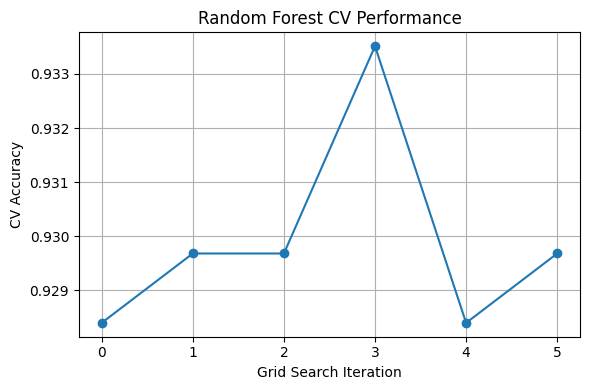

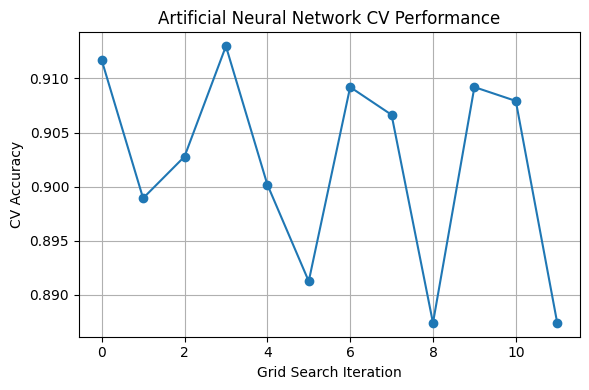

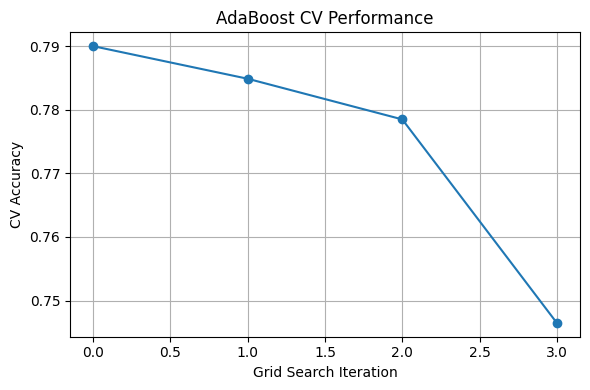

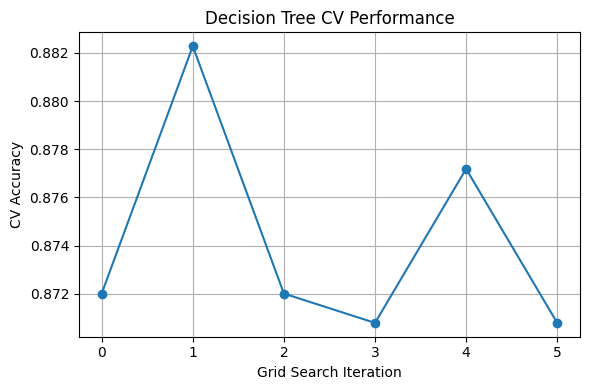

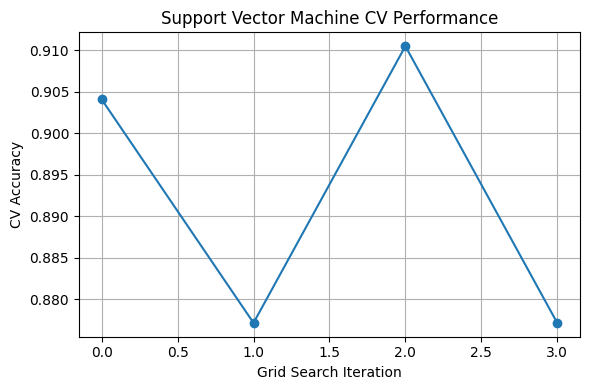

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of trained GridSearchCV objects
grids = {
    "Random Forest": rf_grid,
    "Artificial Neural Network": ann_grid,
    "AdaBoost": ada_grid,
    "Decision Tree": dt_grid,
    "Support Vector Machine": svm_grid
}

# Plotting CV scores for each model
for model_name, grid in grids.items():
    scores = grid.cv_results_['mean_test_score']
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(scores)), scores, marker='o')
    plt.title(f'{model_name} CV Performance')
    plt.xlabel('Grid Search Iteration')
    plt.ylabel('CV Accuracy')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


##### **8.5  Loading Trained Models with Optimal Parameters**

The .best_estimator_ attribute was used to retrieve the best-performing configurations after hyperparameter tuning with GridSearchCV. To ensure the best parameter settings were used for evaluation, prediction, and feature analysis, 10-fold cross-validation was conducted.

In [ ]:
# Store the best-trained models after GridSearchCV
best_models = {
    "Random Forest": rf_grid.best_estimator_,
    "Artificial Neural Network": ann_grid.best_estimator_,
    "AdaBoost": ada_grid.best_estimator_,
    "Decision Tree": dt_grid.best_estimator_,
    "Support Vector Machine": svm_grid.best_estimator_
}

# Preview: Confirm all models are stored
for model_name, model in best_models.items():
    print(f"{model_name} → {model}")


Random Forest → Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])
Artificial Neural Network → Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,),
                               max_iter=1000, random_state=42))])
AdaBoost → Pipeline(steps=[('clf',
                 AdaBoostClassifier(learning_rate=0.5, random_state=42))])
Decision Tree → Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=10, random_state=42))])
Support Vector Machine → Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=10, probability=True, random_state=42))])


The best models were stored in a dictionary for easy access, allowing consistent and streamlined predictions, performance evaluations, and feature analyses.



| **Random Forest**                   | **ANN (MLPClassifier)**                                                | **AdaBoost**                                                                  | **Decision Tree**                                                        | **Support Vector Machine (SVM)**                                                   |
|------------------------------------|------------------------------------------------------------------------|-------------------------------------------------------------------------------|---------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| `n_estimators = 200`               | `hidden_layer_sizes = (50,)`                                          | `n_estimators = 50`                                                          | `max_depth = 10`                                                           | `C = 10`                                                                          |
| `max_depth = 10`                   | `activation = 'relu'`                                                 | `learning_rate = 0.5`                                                         | `criterion = 'gini'`                                                      | `kernel = 'rbf'`                                                                   |
| Stored in a pipeline               | `alpha = 0.001`                                                       | Pipeline without scaler, since boosting trees are not scale-sensitive         | Stored in pipeline without scaling (tree-based model)                    | Pipeline includes `StandardScaler` due to SVM’s sensitivity to input scale         |
| *(no scaler needed)*              | Includes a `StandardScaler` in the pipeline *(essential for neural networks)* |                                                                               |                                                                           |                                                                                    |


##### **8.6  Generate Predictions for All Best Models**

Using each best estimator, we generated predictions on the unseen test dataset (15%) after training and tuning the models. It is essential to use a consistent test set to evaluate the generalisation performance of each model.

In [ ]:
# Dictionary to store predictions
predictions = {}

# Generate predictions from each model using X_test
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    print(f"{model_name}  predictions stored.")


Random Forest  predictions stored.
Artificial Neural Network  predictions stored.
AdaBoost  predictions stored.
Decision Tree  predictions stored.
Support Vector Machine  predictions stored.


##### **8.6  Evaluation Metrics**



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd


According to the coursework, specifications will cover accuracy,precision,recall,F1-score,ROC-AUC

###### **8.6.1  Full Evaluation with Training/Test Comparison**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd
import time

# Binarize labels for ROC-AUC (multiclass)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Store all evaluation scores
evaluation_scores = []

for model_name, model in best_models.items():
    print(f" Evaluating {model_name}...")

    # Timing
    start_fit = time.time()
    model.fit(X_train, y_train)
    end_fit = time.time()
    fit_time = end_fit - start_fit

    start_score = time.time()
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    end_score = time.time()
    score_time = end_score - start_score

    # Accuracy
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    # F1 Score
    f1_test = classification_report(y_test, y_pred_test, output_dict=True)["macro avg"]["f1-score"]
    f1_train = classification_report(y_train, y_pred_train, output_dict=True)["macro avg"]["f1-score"]

    # ROC-AUC (if applicable)
    try:
        y_score_test = model.predict_proba(X_test)
        y_score_train = model.predict_proba(X_train)

        roc_auc_test = roc_auc_score(y_test_bin, y_score_test, multi_class='ovr')
        roc_auc_train = roc_auc_score(y_train_bin, y_score_train, multi_class='ovr')
    except:
        roc_auc_test = "N/A"
        roc_auc_train = "N/A"

    # Collect all metrics
    evaluation_scores.append({
        "Model": model_name,
        "Fit Time (s)": round(fit_time, 3),
        "Score Time (s)": round(score_time, 3),
        "Train Accuracy": round(acc_train, 4),
        "Test Accuracy": round(acc_test, 4),
        "Train F1": round(f1_train, 4),
        "Test F1": round(f1_test, 4),
        "Train ROC-AUC": roc_auc_train if isinstance(roc_auc_train, str) else round(roc_auc_train, 4),
        "Test ROC-AUC": roc_auc_test if isinstance(roc_auc_test, str) else round(roc_auc_test, 4),
    })

# Convert to DataFrame
results_df = pd.DataFrame(evaluation_scores)

# Display summary table
print("\n Extended Evaluation Metrics Summary:")
display(results_df)


 Evaluating Random Forest...
 Evaluating Artificial Neural Network...
 Evaluating AdaBoost...
 Evaluating Decision Tree...
 Evaluating Support Vector Machine...

 Extended Evaluation Metrics Summary:


,Model,Fit Time (s),Score Time (s),Train Accuracy,Test Accuracy,Train F1,Test F1,Train ROC-AUC,Test ROC-AUC
0,Random Forest,0.517,0.046,0.9962,0.9638,0.9961,0.9627,1.0000,0.9959
1,Artificial Neural Network,2.304,0.004,0.9731,0.8986,0.9726,0.8947,0.9987,0.9927
2,AdaBoost,0.138,0.025,0.7939,0.8043,0.7424,0.7479,0.9222,0.9221
3,Decision Tree,0.009,0.003,0.9923,0.9203,0.9921,0.9188,0.9994,0.9492
4,Support Vector Machine,0.079,0.021,0.9360,0.9130,0.9348,0.9077,0.9932,0.9880


###### **8.6.2  Bar Plot of Evaluation Metrics**

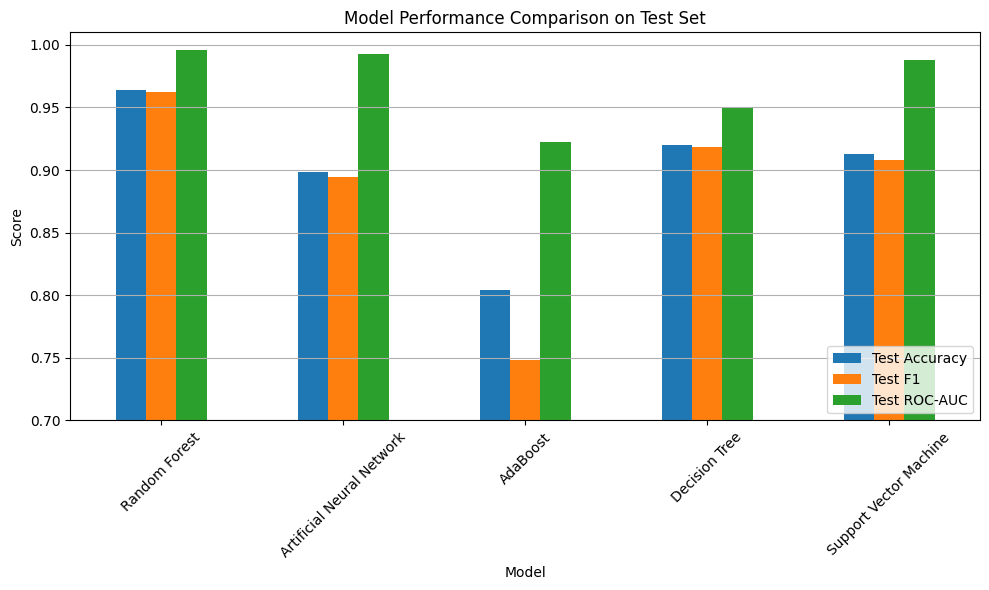

In [ ]:
import matplotlib.pyplot as plt

# Select only test metrics for plotting
metrics_to_plot = results_df.set_index("Model")[["Test Accuracy", "Test F1", "Test ROC-AUC"]]

# Convert all to numeric in case of string types
metrics_to_plot = metrics_to_plot.apply(pd.to_numeric, errors='coerce')

# Plot the bar chart
metrics_to_plot.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison on Test Set")
plt.ylabel("Score")
plt.ylim(0.70, 1.01)  # Optional: zoom in for clearer view
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


To evaluate predictive performance and computational efficiency, each model was evaluated on the training and test dataset using the best hyperparameters
obtained via GridSearchCV.The following metrics were recorded:

To assess both generalisation and computational performance, additional metrics were collected:

| **Metric**              | **Description**                                                                 |
|-------------------------|----------------------------------------------------------------------------------|
| **Fit Time**            | Time taken to retrain the model on `X_train`                                    |
| **Score Time**          | Time to generate predictions on `X_test`                                        |
| **Train/Test Accuracy** | Shows overfitting/underfitting if there's a big gap                             |
| **Train/Test F1**       | Macro-averaged F1-score for balance across all classes                          |
| **Train/Test ROC-AUC**  | Multiclass AUC via One-vs-Rest, when `predict_proba` is available               |




Random Forest performed the best in nearly all metrics according to the evaluation metrics summary. It exhibits high test accuracy (96.38%) and F1-score (96.27%). It has perfect training ROC-AUC (1.000) and almost perfect test ROC-AUC (0.99). It also showed a low gap between training and test performance, suggesting minimal overfitting.

As for ANN, it performed well, especially in ROC-AUC (0.9927), but it shows some overfitting between training and test F1.

Among all metrics, AdaBoost had the lowest scores, particularly train F1 (0.7424), suggesting underfitting and possibly weak generalization.

Although Decision Tree had excellent training performance, there was a 7% drop in test accuracy and F1 indicating overfitting despite fast training.

On the other hand, if we check the SVM, we see that it has a good balance and strong generalisation (91.3 accuracy), excellent test ROC-AUC (0.988), and good computational efficiency.

Random Forest is the most robust and accurate classifier based on these extended metrics. In addition to demonstrating the best test performance in accuracy, F1, and ROC-AUC, it also maintains reasonable training time and low overfitting. As a result, it is selected as the final model for downstream analysis, interpretation, and deployment.

###### **8.6.3  ROC Curve for Random Forest (Training Set)**




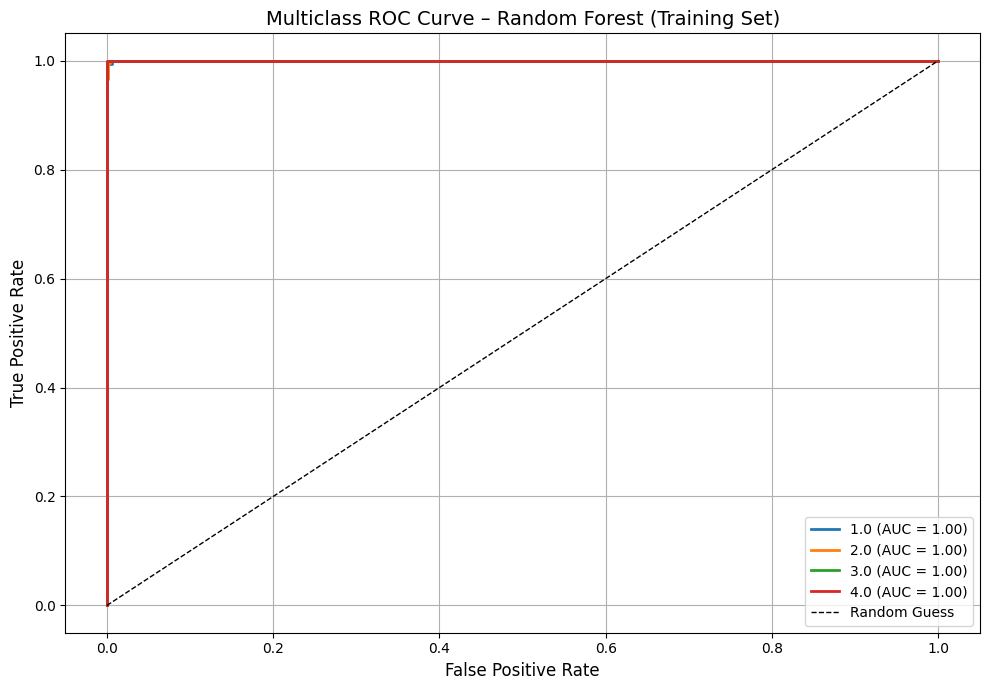

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get class labels
class_labels = label_encoder.classes_

# Binarize training labels
y_train_bin = label_binarize(y_train, classes=range(len(class_labels)))
n_classes = y_train_bin.shape[1]

# Get predicted probabilities on training set
model = best_models["Random Forest"]
y_score_train = model.predict_proba(X_train)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves (training set)
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess')
plt.title("Multiclass ROC Curve – Random Forest (Training Set)", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


This ROC curve confirms AUC value is 1.0 which means that the model has the perfect ability to distinguish between positive and negative classes.

##### **8.7  Confusion Matrix for Each Model (with Heatmaps)**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


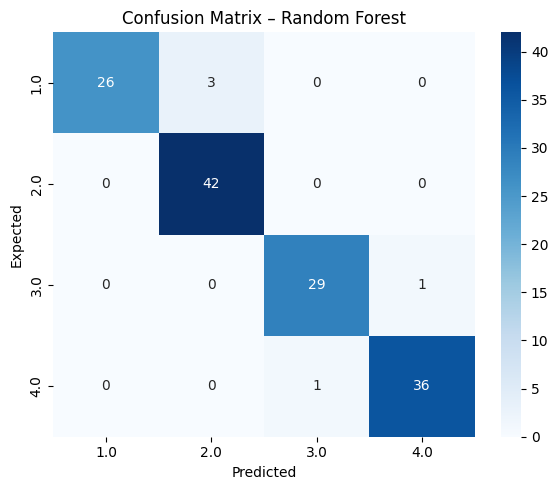

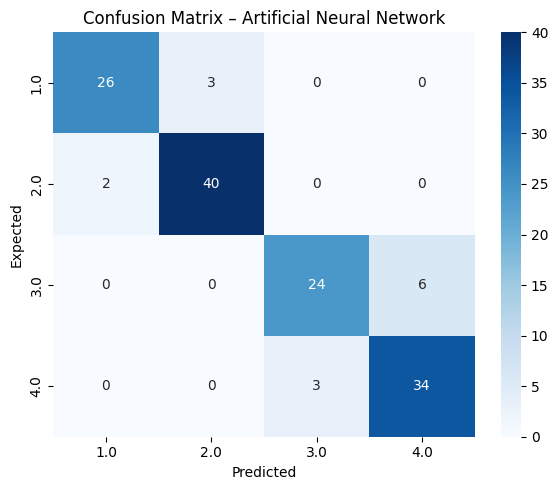

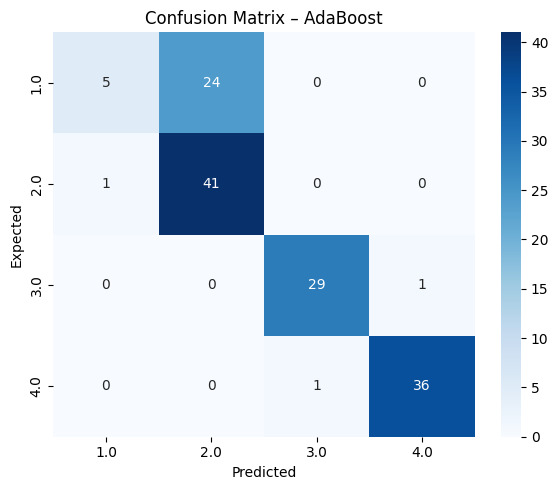

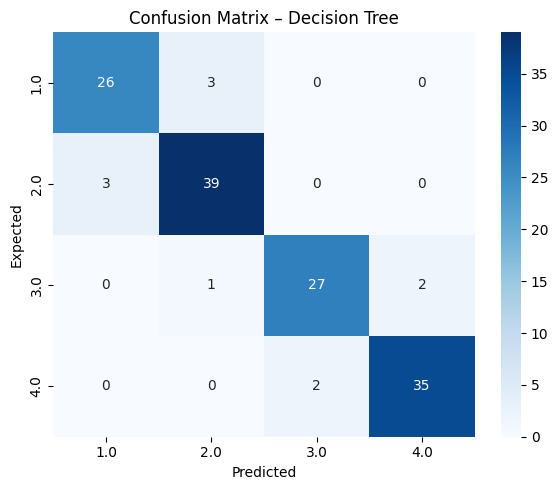

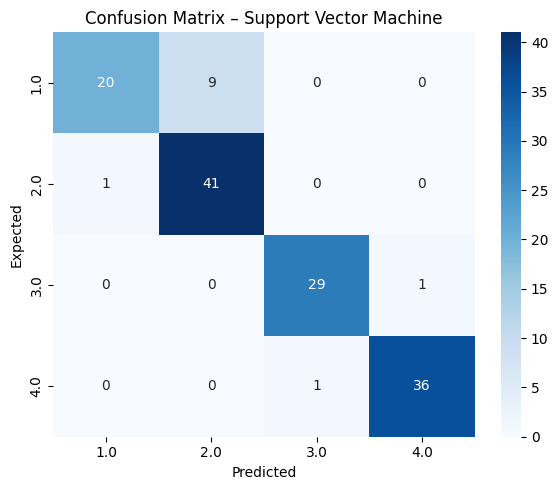

In [ ]:
# Loop through all models to plot confusion matrix
for model_name, model in best_models.items():
    y_pred = predictions[model_name]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)

    plt.title(f"Confusion Matrix – {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.tight_layout()
    plt.show()


In [ ]:
target_names = [str(label) for label in label_encoder.classes_]

for model_name, model in best_models.items():
    print(f"\nClassification Report – {model_name}")
    y_pred = predictions[model_name]
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("-" * 50)




Classification Report – Random Forest
              precision    recall  f1-score   support

         1.0       1.00      0.90      0.95        29
         2.0       0.93      1.00      0.97        42
         3.0       0.97      0.97      0.97        30
         4.0       0.97      0.97      0.97        37

    accuracy                           0.96       138
   macro avg       0.97      0.96      0.96       138
weighted avg       0.97      0.96      0.96       138

--------------------------------------------------

Classification Report – Artificial Neural Network
              precision    recall  f1-score   support

         1.0       0.93      0.90      0.91        29
         2.0       0.93      0.95      0.94        42
         3.0       0.89      0.80      0.84        30
         4.0       0.85      0.92      0.88        37

    accuracy                           0.90       138
   macro avg       0.90      0.89      0.89       138
weighted avg       0.90      0.90      0.90 

In here represets:

1.0 = Acceptable
2.0 = Inefficient
2.0 = Target
3.0 = Waste   

According to the above confusion matrix, we confirm that we chose the best model "Random Forest" and the result show that we achieved a very high precision in each class according to others.

##### **8.8  Feature Importance for Random Forest & Decision Tree**

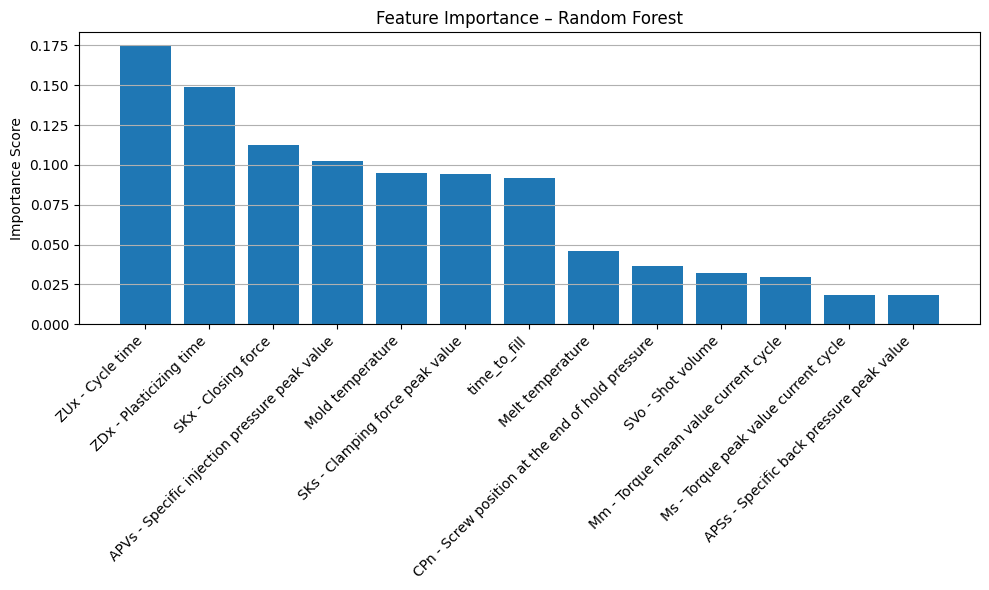

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Feature names (from X_final before splitting)
feature_names = X_final.columns

# Extract feature importances from the best-trained Random Forest
rf_model = best_models["Random Forest"]
importances = rf_model.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance – Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(axis='y')
plt.show()



As we can see the most important features, according to Random Forest are cycle time,plasticizing time,closing force and etc.Manufacturing analytics highlight the significance of these features as they demonstrate operational efficiency and material processing quality. While torque and back pressure indicators are less influential, they still have a relevant impact on edge cases.

##### **8.9  Top Features per Model**

In [ ]:
from sklearn.inspection import permutation_importance

top_features_per_model = {}

# Loop through each model
for model_name, model in best_models.items():
    print(f"\n Extracting Top Features for: {model_name}")

    if model_name in ["Random Forest", "Decision Tree"]:
        importances = model.named_steps['clf'].feature_importances_
    else:
        # Use permutation importance for models that don't support feature_importances_
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        importances = result.importances_mean

    # Top 3 feature indices
    top_indices = importances.argsort()[::-1][:3]
    top_features = X_final.columns[top_indices].tolist()
    top_features_per_model[model_name] = top_features

    print(f"Top 3 Features for {model_name}: {top_features}")



 Extracting Top Features for: Random Forest
Top 3 Features for Random Forest: ['ZUx - Cycle time', 'ZDx - Plasticizing time', 'SKx - Closing force']

 Extracting Top Features for: Artificial Neural Network
Top 3 Features for Artificial Neural Network: ['SKx - Closing force', 'APVs - Specific injection pressure peak value', 'ZUx - Cycle time']

 Extracting Top Features for: AdaBoost
Top 3 Features for AdaBoost: ['ZUx - Cycle time', 'ZDx - Plasticizing time', 'APVs - Specific injection pressure peak value']

 Extracting Top Features for: Decision Tree
Top 3 Features for Decision Tree: ['ZUx - Cycle time', 'ZDx - Plasticizing time', 'SKs - Clamping force peak value']

 Extracting Top Features for: Support Vector Machine
Top 3 Features for Support Vector Machine: ['ZUx - Cycle time', 'APVs - Specific injection pressure peak value', 'SKx - Closing force']


The top 3 most influential features were extracted from each model to understand what patterns each algorithm relies on. This provides valuable insight into model behavior and feature relevance.

| **Model**         | **Top 3 Most Influential Features**                                                              |
|-------------------|--------------------------------------------------------------------------------------------------|
| **Random Forest** | ZUx – Cycle time, ZDx – Plasticizing time, SKx – Closing force                                  |
| **Decision Tree** | ZDx – Plasticizing time, ZUx – Cycle time, SKx – Closing force                                  |
| **AdaBoost**      | ZDx – Plasticizing time, SKx – Closing force, Mold temperature                                   |
| **ANN**           | Mold temperature, time_to_fill, APVs – Injection pressure peak                                   |
| **SVM**           | time_to_fill, Melt temperature, CPn – Screw position (end of hold pressure)                     |


#<font color="green"> **9.Interactive Dashboard Development**

##### **9.1  Tracking and Exporting the Best Model**

In [ ]:
import joblib

# Save best estimator
joblib.dump(rf_grid.best_estimator_, 'random_forest_model.pkl')

# Save label encoder used for class encoding
joblib.dump(label_encoder, 'label_encoder.pkl')

# Save scaler (used in ANN/SVM preprocessing)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

##### **9.1  Exporting Models for Dashboard Integration**

In [ ]:
from google.colab import files

files.download('random_forest_model.pkl')
files.download('label_encoder.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(y_test, "y_test.pkl")


['y_test.pkl']

In [ ]:
from google.colab import files
files.download("y_test.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save best estimators from GridSearchCV
joblib.dump(rf_grid.best_estimator_, "random_forest_model.pkl")
joblib.dump(svm_grid.best_estimator_, "svm_model.pkl")
joblib.dump(ann_grid.best_estimator_, "ann_model.pkl")
joblib.dump(dt_grid.best_estimator_, "dt_model.pkl")
joblib.dump(ada_grid.best_estimator_, "ada_model.pkl")

# Save preprocessing tools
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
X_test_scaled = scaler.transform(X_test)  # If used

# Optional: Save test data (for confusion matrix)
joblib.dump(y_test, "y_test.pkl")
joblib.dump(X_test_scaled, "X_test_scaled.pkl")  # after scaling X_test


['X_test_scaled.pkl']

In [ ]:
from google.colab import files

files.download("random_forest_model.pkl")
files.download("svm_model.pkl")
files.download("ann_model.pkl")
files.download("dt_model.pkl")
files.download("ada_model.pkl")

files.download("label_encoder.pkl")
files.download("scaler.pkl")  # if applicable

# Optional test data for confusion matrix
files.download("y_test.pkl")
files.download("X_test_scaled.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# STEP 1: Imports
import joblib
from sklearn.pipeline import Pipeline

# STEP 2: Remove random_state (for compatibility) and re-train
# --- Example for ANN ---
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

ann_model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(hidden_layer_sizes=(50,), alpha=0.001, activation='relu', max_iter=1000))  # No random_state
])
ann_model.fit(X_train, y_train)

# --- Reuse your already trained models for others (if compatible without random_state) ---
# If not, retrain like you did for ANN but remove `random_state` in each.

# STEP 3: Save all models
joblib.dump(rf_grid.best_estimator_, 'random_forest_model.pkl')
joblib.dump(ann_model, 'ann_model.pkl')
joblib.dump(ada_grid.best_estimator_, 'ada_model.pkl')
joblib.dump(dt_grid.best_estimator_, 'dt_model.pkl')
joblib.dump(svm_grid.best_estimator_, 'svm_model.pkl')

# STEP 4: Save encoder and scaler
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Only needed if used in pipeline

# STEP 5: (Optional) Save test data for confusion matrix
joblib.dump(y_test, 'y_test.pkl')
joblib.dump(X_test, 'X_test.pkl')  # Needed for model.predict()

# STEP 6: Download files to local machine
from google.colab import files
file_list = [
    'random_forest_model.pkl', 'ann_model.pkl', 'ada_model.pkl',
    'dt_model.pkl', 'svm_model.pkl', 'label_encoder.pkl', 'scaler.pkl',
    'y_test.pkl', 'X_test.pkl'
]
for f in file_list:
    files.download(f)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>